In [1]:
#related https://realpython.com/numpy-scipy-pandas-correlation-python/
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from math import sqrt
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import pyodbc library
import pyodbc

In [3]:
#check for drivers
for driver in pyodbc.drivers():
    print(driver)

SQL Server
Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)
SQL Server Native Client 11.0
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)


In [4]:
#set connection
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-42IUD2D;'
                      'Database=Pharmacy_Price_Comparsion;'
                      'Trusted_Connection=yes;')

In [5]:
cursor = conn.cursor()

In [6]:
#import ogyi_product_names from dbo.ogyi_product_list_simplified
benu_daily = pd.read_sql_query('''SELECT * from dbo.benu_daily_raw_data''', conn)
# pingvin_daily = pd.read_sql_query('''SELECT * from dbo.pingvin_daily_raw_data''', conn)
# medexpressz_daily= pd.read_sql_query('''SELECT * from dbo.medexpressz_daily_raw_data''', conn)
currency_daily= pd.read_sql_query('''SELECT * from dbo.mnb_currency_raw_data''', conn)
weather_daily=pd.read_sql_query('''SELECT * from dbo.accuweather_raw_data_extended''', conn)
pollen_data=pd.read_sql_query('''SELECT * from met_hu_pollen_raw_data''', conn)
covid_data=pd.read_sql_query('''SELECT * from dbo.covid_weekly_raw_data''', conn)

In [7]:
#currency_daily

In [8]:
#Fixing time period
benu_daily.date=pd.to_datetime(benu_daily.date,dayfirst=True)
benu_daily['date'].unique()
benu_daily=benu_daily[benu_daily['date']<'2020-09-11T00:00:00.000000000']

currency_daily.date=pd.to_datetime(currency_daily.date,dayfirst=True)
currency_daily['date'].unique()
currency_daily=currency_daily[currency_daily['date']<'2020-09-11T00:00:00.000000000']

weather_daily.date=pd.to_datetime(weather_daily.date,dayfirst=True)
weather_daily['date'].unique()
weather_daily=weather_daily[weather_daily['date']<'2020-09-11T00:00:00.000000000']

pollen_data.date=pd.to_datetime(pollen_data.date,dayfirst=True)
pollen_data['date'].unique()
pollen_data=pollen_data[pollen_data['date']<'2020-09-11T00:00:00.000000000']

covid_data.date=pd.to_datetime(covid_data.date,dayfirst=True)
covid_data['date'].unique()
covid_data=covid_data[covid_data['date']<'2020-09-11T00:00:00.000000000']

In [9]:
array_len=[len(benu_daily.date.unique()),len(currency_daily.date.unique()), len(weather_daily.date.unique()), len(pollen_data.date.unique()),len(covid_data.date.unique())]
array_len=min(array_len)
array_len

47

In [10]:
benu_daily  

,ogyi_product_name,product_name,price,promo_price,original_price,unit_price,availability,date
0,ACC 100 mg granulátum gyermekeknek ...,ACC 100 mg granulátum gyermekeknek 30x3g,1549,üres,üres,"51,60 Ft/db",Készleten,2020-07-25
1,ACC 20 mg/ml belsőleges oldat ...,ACC 20 mg/ml belsőleges oldat 100ml,1549,üres,üres,"15,50 Ft/ml",Készleten,2020-07-25
2,ACC 200 mg granulátum ...,ACC 200 granulátum 30x3g,2499,üres,üres,"82,60 Ft/db",Készleten,2020-07-25
3,ACC HOT 600 mg por belsõleges oldathoz ...,ACC Hot 600 mg por belsőleges oldathoz 10x,2599,üres,üres,"259,90 Ft/db",üres,2020-07-25
4,ACC INSTANT 600 mg belsőleges por ...,ACC Instant 600 mg belsőleges por 10x,2899,üres,üres,"289,90 Ft/db",üres,2020-07-25
...,...,...,...,...,...,...,...,...
16435,XILOMARE 1 mg/ml oldatos orrspray,"Xilomare Kid 0,5mg/ml oldatos orrspray 10ml",2099,Ã¼res,Ã¼res,"209,90 Ft/ml",Készleten,2020-09-10
16436,"XYZAL 0,5 mg/ml belsőleges oldat","Xyzal 0,5 mg/ml belsőleges oldat 200ml",2599,Ã¼res,Ã¼res,"13,00 Ft/ml",Készleten,2020-09-10
16437,XYZAL 5 mg filmtabletta,Xyzal 5 mg filmtabletta 10x,1249,Ã¼res,Ã¼res,"124,90 Ft/Ft/db",Készleten,2020-09-10
16438,ZILOLA 5 mg filmtabletta,Zilola 5 mg filmtabletta 28x,2299,Ã¼res,Ã¼res,"82,10 Ft/db",Készleten,2020-09-10


In [11]:
benu_daily['date'].unique()

array(['2020-07-25T00:00:00.000000000', '2020-07-26T00:00:00.000000000',
       '2020-07-27T00:00:00.000000000', '2020-07-29T00:00:00.000000000',
       '2020-07-28T00:00:00.000000000', '2020-07-30T00:00:00.000000000',
       '2020-07-31T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-08-03T00:00:00.000000000', '2020-08-02T00:00:00.000000000',
       '2020-08-04T00:00:00.000000000', '2020-08-05T00:00:00.000000000',
       '2020-08-06T00:00:00.000000000', '2020-08-08T00:00:00.000000000',
       '2020-08-07T00:00:00.000000000', '2020-08-09T00:00:00.000000000',
       '2020-08-12T00:00:00.000000000', '2020-08-10T00:00:00.000000000',
       '2020-08-11T00:00:00.000000000', '2020-08-14T00:00:00.000000000',
       '2020-08-15T00:00:00.000000000', '2020-08-13T00:00:00.000000000',
       '2020-08-25T00:00:00.000000000', '2020-08-26T00:00:00.000000000',
       '2020-08-27T00:00:00.000000000', '2020-08-18T00:00:00.000000000',
       '2020-08-16T00:00:00.000000000', '2020-08-17

In [12]:
#Check descriptive stat
benu_daily['price'].describe()

count     9831
unique      52
top       2599
freq       573
Name: price, dtype: object

In [13]:
#Check if there is price with "üres" value
for i in range(len(benu_daily)):
    if benu_daily['price'].iloc[i]=="üres" or benu_daily['price'].iloc[i]=='Ã¼res':
        print(benu_daily['price'].iloc[i], benu_daily['product_name'].iloc[i],benu_daily['date'].iloc[i])

üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-07-25 00:00:00
üres Daedalonetta végbélkúp gyermeknek 10x 2020-07-25 00:00:00
üres Loratadin HEXAL 10 mg tabletta 30x 2020-07-25 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-07-26 00:00:00
üres Daedalonetta végbélkúp gyermeknek 10x 2020-07-26 00:00:00
üres Loratadin HEXAL 10 mg tabletta 30x 2020-07-26 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-07-27 00:00:00
üres Daedalonetta végbélkúp gyermeknek 10x 2020-07-27 00:00:00
üres Loratadin HEXAL 10 mg tabletta 30x 2020-07-27 00:00:00
üres Daedalonetta végbélkúp gyermeknek 10x 2020-07-27 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-07-27 00:00:00
Ã¼res Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-07-27 00:00:00
Ã¼res Daedalonetta végbélkúp gyermeknek 10x 2020-07-27 00:00:00
Ã¼res Loratadin HEXAL 10 mg tabletta 30x 2020-07-27 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-07-28 00:00:00
üres Daedalonetta végbélkúp gyerme

üres Daedalonetta végbélkúp gyermeknek 10x 2020-08-27 00:00:00
üres Loratadin HEXAL 10 mg tabletta 30x 2020-08-26 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-08-27 00:00:00
üres Daedalonetta végbélkúp gyermeknek 10x 2020-08-27 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-08-27 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-08-28 00:00:00
üres Loratadin HEXAL 10 mg tabletta 30x 2020-08-27 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-08-29 00:00:00
üres Daedalonetta végbélkúp gyermeknek 10x 2020-08-29 00:00:00
üres Daedalonetta végbélkúp gyermeknek 10x 2020-08-28 00:00:00
üres Loratadin HEXAL 10 mg tabletta 30x 2020-08-28 00:00:00
üres Loratadin HEXAL 10 mg tabletta 30x 2020-08-29 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-08-31 00:00:00
üres Daedalonetta végbélkúp gyermeknek 10x 2020-08-31 00:00:00
üres Cetirizin 1a Pharma 10 mg filmtabletta 10x 2020-08-30 00:00:00
üres Daedalonetta végbélkúp gyermekne

In [14]:
#Remove these records
benu_daily.drop(benu_daily.loc[benu_daily['price']=='üres'].index, inplace=True)
benu_daily.drop(benu_daily.loc[benu_daily['price']=='Ã¼res'].index, inplace=True)

In [15]:
#Convert price to int
benu_daily['price']=benu_daily['price'].astype(int)
type(benu_daily['price'][0])

numpy.int32

In [16]:
len(benu_daily['price'].values)

9588

In [17]:
#Get a list of unique product names
product_names=benu_daily['product_name'].unique()
product_names

array(['ACC 100 mg granulátum gyermekeknek 30x3g',
       'ACC 20 mg/ml belsőleges oldat 100ml', 'ACC 200 granulátum 30x3g',
       'ACC Hot 600 mg por belsőleges oldathoz 10x',
       'ACC Instant 600 mg belsőleges por 10x',
       'ACC long 600 mg pezsgőtabletta 10x',
       'Allegra 120 mg filmtabletta 10x',
       'Allegra Forte 180 mg filmtabletta 10x',
       'Allenasal 1mg/ml oldatos orrspray 10ml',
       'Allergodil oldatos orrspray 10ml',
       'Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 100ml',
       'Ambroxol-TEVA 30 mg tabletta 30x',
       'Ambroxol-TEVA 75 mg retard kemény kapszula 20x',
       'Angised Mentol szopogató tabletta 24x',
       'Baby Luuf illóolajos kenőcs 30g', 'Bronchipret filmtabletta 20x',
       'Bronchipret szirup 50ml',
       'Bronchostop köhögés elleni belsőleges gumipasztilla 20x',
       'Bronchostop köhögés elleni belsőleges oldat 150ml',
       'Cetimax 10 mg filmtabletta 10x', 'Cezera 5 mg filmtabletta 30x',
       'Claritine 10 mg tablett

In [18]:
#Get the price values per day for a product
list_of_prices=[]
for i in range(len(product_names)):
    list_of_prices.append(benu_daily.loc[benu_daily["product_name"] == product_names[i]].drop_duplicates(subset='date')['price'].values)
len(list_of_prices)


121

In [19]:
count_pc=[]
count_no_pc=[]
for i in range(len(list_of_prices)):
    if len(pd.Series(list_of_prices[i]).unique())==1:
        count_no_pc.append(product_names[i])   
    else:count_pc.append(product_names[i])
len(count_no_pc)     

86

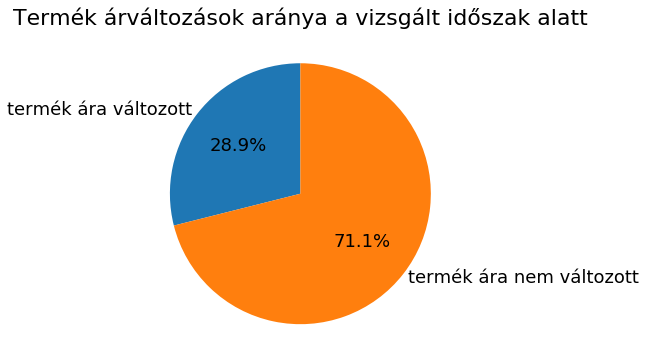

In [20]:
#plot proportion of products with and without price change
sizes=list([len(count_pc), len(count_no_pc)])
labels=list(['termék ára változott','termék ára nem változott'])

fig,ax=plt.subplots(figsize=(6, 6))
plt.style.use('seaborn-pastel')


#my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(sizes, labels=labels, autopct='%1.1f%%',
            startangle=90, labeldistance=1.05, textprops={'fontsize': 18})

#ax.set_facecolor("orange")
#plt.axis('equal')
#plt.gca().add_artist(my_circle)

plt.title('Termék árváltozások aránya a vizsgált időszak alatt', size=22)

#fig.tight_layout()

#plt.savefig('products_with_and_without_price.png',bbox_inches = 'tight')
            
plt.show()

In [21]:
len(product_names)

121

In [22]:
list_price_filtered=[]
product_names_filtered=[]
list_price_no_change=[]
for i in range(len(list_of_prices)):
    if len(list_of_prices[i])>=array_len:
        if len(pd.Series(list_of_prices[i]).unique())>1:
            list_price_filtered.append(list_of_prices[i][0:array_len])
            product_names_filtered.append(product_names[i])
        else: list_price_no_change.append((list_of_prices[i][0:array_len]))
len(list_price_filtered)
#len(product_names_filtered)

32

In [23]:
len(list_price_no_change)

80

In [24]:
product_names=product_names_filtered
product_names

['ACC 100 mg granulátum gyermekeknek 30x3g',
 'ACC 20 mg/ml belsőleges oldat 100ml',
 'ACC 200 granulátum 30x3g',
 'Allergodil oldatos orrspray 10ml',
 'Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 100ml',
 'Daedalon 50 mg tabletta 10x',
 'Dorithricin szopogató tabletta erdei gyümölcs ízű 20x',
 'Grippostad C kemény kapszula 20x',
 'Halixol 30 mg tabletta 20x',
 'Inaller 5 mg filmtabletta 30x',
 'Mucofree 15 mg pasztilla 20x',
 'Mucofree 30 mg/5 ml szirup 100ml',
 'Nasivin Kids 0,25 mg/ml oldatos orrcsepp 10ml',
 'Nasopax orrspray felnőtteknek 10ml',
 'Otrivin Rapid 1 mg/ml adagoló oldatos orrspray (0,1%) 10ml',
 'Otrivin Rapid 1 mg/ml oldatos orrcsepp (0,1%) 10ml',
 'Otrivin Rapid Menthol 1 mg/ml adagoló oldatos orrspray 10ml',
 'Rhinospray Plus orrspray 10ml',
 'Robitussin Antitussicum szirup 100ml',
 'Robitussin Expectorans szirup 100ml',
 'Robitussin Junior szirup 100ml',
 'Septofort tabletta 24x',
 'Sinupret forte bevont tabletta 20x',
 'Snup 1 mg/ml oldatos orrspray 10ml',
 'Stre

In [25]:
list_of_prices=list_price_filtered
list_of_prices

[array([1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699]),
 array([1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699]),
 array([2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499,
        2499, 2499, 2499, 2499, 2499, 2499, 2499, 2499, 2729, 2729, 2729,
        2729, 2729, 2729, 2729, 2729, 2729, 2729, 2729, 2729, 2729, 2729,
        2729, 2729, 2729, 2729, 2299, 2299, 2299, 2299, 2299, 2299, 2299,
        2299, 2299, 2299]),
 array([2249, 2249, 2249, 22

In [26]:
#Create dataframe to store correlation data. Correlation data is calculated based on the accumulated data till today, includin today's data as well
column_names=['product_name','eur_er', 'usd_er','chf_er', 'cny_er','gbp_er', 'lowest_temp_daily','diff_temp_vs_py','pollen','covid_new_case', 'covid_death_stat','date']
benu_correlation_summary_table=pd.DataFrame(columns=column_names)
benu_correlation_summary_table

,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date


In [27]:
#Add product names
benu_correlation_summary_table['product_name']=product_names
benu_correlation_summary_table

,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACC 20 mg/ml belsőleges oldat 100ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACC 200 granulátum 30x3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Allergodil oldatos orrspray 10ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Daedalon 50 mg tabletta 10x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Dorithricin szopogató tabletta erdei gyümölcs ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Grippostad C kemény kapszula 20x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Halixol 30 mg tabletta 20x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Inaller 5 mg filmtabletta 30x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Add dates
from datetime import datetime
benu_correlation_summary_table['date']= datetime.now().strftime("%d/%m/%Y")
benu_correlation_summary_table

,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/02/2021


In [29]:
#Check weather_daily
weather_daily

,date,highest_temp,lowest_temp,historic_avg_highest,historic_avg_lowest,snow_mm,rain_mm
0,2020-08-01,30.0,17.0,27.0,15.0,0.0,0.0
1,2020-09-01,20.0,11.0,25.0,13.0,0.0,0.0
2,2020-08-02,28.0,15.0,27.0,15.0,0.0,0.3
3,2020-09-02,21.0,11.0,25.0,13.0,0.0,0.0
4,2020-08-03,29.0,18.0,27.0,15.0,0.0,1.5
5,2020-09-03,24.0,12.0,24.0,13.0,0.0,0.0
6,2020-08-04,28.0,18.0,27.0,15.0,0.0,14.0
7,2020-09-04,26.0,14.0,24.0,13.0,0.0,0.0
8,2020-08-05,25.0,17.0,27.0,15.0,0.0,0.0
9,2020-09-05,28.0,15.0,24.0,12.0,0.0,0.0


In [30]:
type(weather_daily['lowest_temp'].values[0])

numpy.float64

In [31]:
weather_daily['lowest_temp']=weather_daily['lowest_temp'].astype(int)
type(weather_daily['lowest_temp'][0])

weather_daily['historic_avg_lowest']=weather_daily['historic_avg_lowest'].astype(int)
type(weather_daily['historic_avg_lowest'][0])

numpy.int32

In [32]:
#From weather data I will use the lowest temp and the difference between lowest temp and historic_avg_lowest as I suppose this might influence the frequency of  respiratory system related illness
weather_daily
lowest_temp=weather_daily['lowest_temp']
#len(lowest_temp)

In [33]:
#Count difference between lowest temp and historic_avg_lowest 
diff_compare_to_avg_lowest=[]
for i in range(len(weather_daily)):
    diff_compare_to_avg_lowest.append(int(weather_daily['lowest_temp'].iloc[i])-int(weather_daily['historic_avg_lowest'].iloc[i]))
diff_compare_to_avg_lowest
type(diff_compare_to_avg_lowest[0])

int

In [34]:
weather_daily['lowest_temp'][0:array_len].values

array([17, 11, 15, 11, 18, 12, 18, 14, 17, 15, 19, 16, 21, 13, 21, 11, 21,
       12, 20, 16, 20, 18, 20, 18, 18, 19, 19, 18, 17, 15, 17, 21, 17, 19,
       17, 14, 16, 17, 18, 14, 16, 18, 20, 19, 21, 17, 18])

In [35]:
#TO DO: check which list had price change->unique values
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    #print(len(x))
    y=weather_daily['lowest_temp'][0:array_len].values
    #print(len(y))
    r = np.corrcoef(x, y)
    #print(r[0, 1])
    benu_correlation_summary_table['lowest_temp_daily'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,NaN,NaN,NaN,NaN,NaN,0.412113,NaN,NaN,NaN,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,NaN,NaN,NaN,NaN,NaN,0.412113,NaN,NaN,NaN,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,NaN,NaN,NaN,NaN,NaN,0.0652199,NaN,NaN,NaN,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,NaN,NaN,NaN,NaN,NaN,0.0374648,NaN,NaN,NaN,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,NaN,NaN,NaN,NaN,NaN,-0.17551,NaN,NaN,NaN,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,NaN,NaN,NaN,NaN,NaN,-0.162924,NaN,NaN,NaN,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,NaN,NaN,NaN,NaN,NaN,-0.212508,NaN,NaN,NaN,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,NaN,NaN,NaN,NaN,NaN,0.428651,NaN,NaN,NaN,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,NaN,NaN,NaN,NaN,NaN,-0.160915,NaN,NaN,NaN,NaN,12/02/2021


In [36]:
#TO DO: check which list had price change->unique values
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    y=diff_compare_to_avg_lowest[0:array_len]
    r = np.corrcoef(x, y)
    benu_correlation_summary_table['diff_temp_vs_py'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,NaN,NaN,NaN,NaN,NaN,0.412113,0.441586,NaN,NaN,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,NaN,NaN,NaN,NaN,NaN,0.412113,0.441586,NaN,NaN,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,NaN,NaN,NaN,NaN,NaN,0.0652199,0.0556246,NaN,NaN,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,NaN,NaN,NaN,NaN,NaN,0.0374648,-0.0905817,NaN,NaN,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,NaN,NaN,NaN,NaN,NaN,0,0.0781867,NaN,NaN,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,NaN,NaN,NaN,NaN,NaN,-0.17551,-0.270876,NaN,NaN,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,NaN,NaN,NaN,NaN,NaN,-0.162924,-0.109119,NaN,NaN,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,NaN,NaN,NaN,NaN,NaN,-0.212508,-0.143808,NaN,NaN,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,NaN,NaN,NaN,NaN,NaN,0.428651,0.439849,NaN,NaN,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,NaN,NaN,NaN,NaN,NaN,-0.160915,-0.25451,NaN,NaN,NaN,12/02/2021


In [37]:
pollen=pollen_data.drop_duplicates()
pollen

,date,city,plant_type,pollen_concentration_level
0,2020-07-27,Budapest,alternaria,4.0
1,2020-07-27,Budapest,cladosporium,4.0
2,2020-07-27,Budapest,csalánfélék,3.0
3,2020-07-27,Budapest,epicoccum,2.0
4,2020-07-27,Budapest,hárs,1.0
...,...,...,...,...
779,2020-09-10,Budapest,lórom,0.0
780,2020-09-10,Budapest,parlagfű,3.0
781,2020-09-10,Budapest,pázsitfűfélék,1.0
782,2020-09-10,Budapest,üröm,0.0


In [38]:
pollen_parlagfu=pollen_data[pollen_data['plant_type']=='parlagfű']['pollen_concentration_level']
pollen_parlagfu=pollen_parlagfu.astype(int)
# len(pollen_parlagfu)

In [39]:
pollen_parlagfu[0:array_len].values

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 4, 1, 0, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4])

In [40]:
#TO DO: check which list had price change->unique values
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    y=pollen_parlagfu[0:array_len]
    r = np.corrcoef(x, y)
    benu_correlation_summary_table['pollen'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,NaN,NaN,NaN,NaN,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,NaN,NaN,NaN,NaN,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,NaN,NaN,NaN,NaN,NaN,0.0652199,0.0556246,-0.180168,NaN,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,NaN,NaN,NaN,NaN,NaN,0.0374648,-0.0905817,0.081191,NaN,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,NaN,NaN,NaN,NaN,NaN,0,0.0781867,0.150668,NaN,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,NaN,NaN,NaN,NaN,NaN,-0.17551,-0.270876,-0.0734239,NaN,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,NaN,NaN,NaN,NaN,NaN,-0.162924,-0.109119,-0.530627,NaN,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,NaN,NaN,NaN,NaN,NaN,-0.212508,-0.143808,-0.150668,NaN,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,NaN,NaN,NaN,NaN,NaN,0.428651,0.439849,0.62972,NaN,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,NaN,NaN,NaN,NaN,NaN,-0.160915,-0.25451,-0.0469141,NaN,NaN,12/02/2021


In [41]:
currency_daily

,date,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,EUR,...,RON,RSD,RUB,SEK,SGD,THB,TRY,UAH,USD,ZAR
0,2020-08-01,"209,05","176,26","56,38","216,58","320,23","41,67","13,18","46,30","344,74",...,"71,33","2,93","3,94","33,50","211,97","9,31","41,66","10,50","290,67","17,17"
1,2020-09-01,"221,11","182,57","55,78","230,42","329,93","44,12","13,56","47,99","357,09",...,"73,76","3,04","4,06","34,65","221,15","9,63","40,81","10,89","301,16","18,00"
5,2020-08-02,"209,05","176,26","56,38","216,58","320,23","41,67","13,18","46,30","344,74",...,"71,33","2,93","3,94","33,50","211,97","9,31","41,66","10,50","290,67","17,17"
6,2020-09-02,"221,11","182,57","55,78","230,42","329,93","44,12","13,56","47,99","357,09",...,"73,76","3,04","4,06","34,65","221,15","9,63","40,81","10,89","301,16","18,00"
8,2020-08-03,"208,71","176,38","56,09","218,31","319,37","41,98","13,12","46,33","344,99",...,"71,37","2,93","3,96","33,46","213,06","9,39","41,97","10,57","292,89","17,02"
9,2020-09-03,"221,18","182,88","56,60","231,17","331,74","44,23","13,60","48,07","357,69",...,"73,83","3,04","4,01","34,62","221,71","9,65","40,69","10,94","302,28","18,07"
13,2020-08-04,"208,85","176,25","54,95","218,72","319,29","41,88","13,15","46,30","344,73",...,"71,30","2,93","3,98","33,49","212,63","9,40","42,13","10,50","292,34","16,95"
14,2020-09-04,"221,18","182,88","56,60","231,17","331,74","44,23","13,60","48,07","357,69",...,"73,83","3,04","4,01","34,62","221,71","9,65","40,69","10,94","302,28","18,07"
16,2020-08-05,"210,32","176,82","55,20","220,02","320,89","42,07","13,24","46,42","345,84",...,"71,55","2,94","4,00","33,58","213,19","9,42","41,57","10,55","292,07","16,94"
17,2020-09-05,"221,03","183,77","57,29","231,51","333,20","44,32","13,61","48,31","359,43",...,"74,12","3,06","4,04","34,70","222,25","9,66","40,75","10,94","303,11","18,22"


In [42]:
eur_er=currency_daily['EUR']
eur_er

0      344,74    
1      357,09    
5      344,74    
6      357,09    
8      344,99    
9      357,69    
13     344,73    
14     357,69    
16     345,84    
17     359,43    
20     346,38    
21     359,43    
24     346,21    
25     360,18    
27     346,21    
28     360,18    
31     346,21    
32     357,98    
34     345,36    
35     357,56    
36     344,89    
39     345,69    
42     344,97    
46     346,25    
49     346,25    
52     346,25    
55     348,17    
58     349,92    
61     349,64    
64     349,64    
68     349,64    
71     349,64    
74     349,64    
77     351,80    
79     347,54    
80     353,71    
82     347,54    
83     353,95    
85     345,79    
86     356,30    
89     346,15    
90     355,85    
92     347,25    
93     355,85    
95     345,71    
96     355,85    
100    344,74    
101    354,06    
Name: EUR, dtype: object

In [43]:
eur_er=currency_daily['EUR']
type(eur_er[0])
for i in range(len(eur_er)):
    eur_er.iloc[i]=eur_er.iloc[i].replace(",",".")
type(eur_er.iloc[0])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


str

In [44]:
for i in range(len(eur_er)):
    eur_er.iloc[i]=float(eur_er.iloc[i])
type(eur_er[0])

float

In [45]:
usd_er=currency_daily['USD']
type(usd_er[0])
for i in range(len(usd_er)):
    usd_er.iloc[i]=usd_er.iloc[i].replace(",",".")
type(usd_er[0])

str

In [46]:
for i in range(len(usd_er)):
    usd_er.iloc[i]=float(usd_er.iloc[i])
type(usd_er.iloc[0])

float

In [47]:
cny_er=currency_daily['CNY']
for i in range(len(cny_er)):
    cny_er.iloc[i]=cny_er.iloc[i].replace(",",".")
type(cny_er.iloc[0])

str

In [48]:
for i in range(len(cny_er)):
    cny_er.iloc[i]=float(cny_er.iloc[i])
type(cny_er.iloc[0])

float

In [49]:
chf_er=currency_daily['CHF']
for i in range(len(cny_er)):
    chf_er.iloc[i]=chf_er.iloc[i].replace(",",".")
type(chf_er.iloc[0])

str

In [50]:
for i in range(len(chf_er)):
    chf_er.iloc[i]=float(chf_er.iloc[i])
type(chf_er.iloc[0])

float

In [51]:
gbp_er=currency_daily['GBP']
for i in range(len(gbp_er)):
    gbp_er.iloc[i]=gbp_er.iloc[i].replace(",",".")
type(gbp_er.iloc[0])

str

In [52]:
for i in range(len(gbp_er)):
    gbp_er.iloc[i]=float(gbp_er.iloc[i])
type(gbp_er.iloc[0])

float

In [53]:
#NumPy Correlation Calculation - product price & lowest temp
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    y=eur_er[0:array_len]
    r=np.corrcoef(x, y.astype(float))
    benu_correlation_summary_table['eur_er'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,-0.0997002,NaN,NaN,NaN,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,-0.0997002,NaN,NaN,NaN,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,-0.1779,NaN,NaN,NaN,NaN,0.0652199,0.0556246,-0.180168,NaN,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,-0.234889,NaN,NaN,NaN,NaN,0.0374648,-0.0905817,0.081191,NaN,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,0.152458,NaN,NaN,NaN,NaN,0,0.0781867,0.150668,NaN,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,0.0391885,NaN,NaN,NaN,NaN,-0.17551,-0.270876,-0.0734239,NaN,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,-0.0186667,NaN,NaN,NaN,NaN,-0.162924,-0.109119,-0.530627,NaN,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,0.1307,NaN,NaN,NaN,NaN,-0.212508,-0.143808,-0.150668,NaN,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,-0.150304,NaN,NaN,NaN,NaN,0.428651,0.439849,0.62972,NaN,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,0.0412782,NaN,NaN,NaN,NaN,-0.160915,-0.25451,-0.0469141,NaN,NaN,12/02/2021


In [54]:
#NumPy Correlation Calculation - product price & lowest temp
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    y=usd_er[0:array_len]
    r = np.corrcoef(x, y.astype(float))
    benu_correlation_summary_table['usd_er'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,-0.0997002,-0.0678964,NaN,NaN,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,-0.0997002,-0.0678964,NaN,NaN,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,-0.1779,-0.210173,NaN,NaN,NaN,0.0652199,0.0556246,-0.180168,NaN,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,-0.234889,-0.212662,NaN,NaN,NaN,0.0374648,-0.0905817,0.081191,NaN,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,0.152458,0.0838223,NaN,NaN,NaN,0,0.0781867,0.150668,NaN,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,0.0391885,0.118534,NaN,NaN,NaN,-0.17551,-0.270876,-0.0734239,NaN,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,-0.0186667,-0.119863,NaN,NaN,NaN,-0.162924,-0.109119,-0.530627,NaN,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,0.1307,0.0630262,NaN,NaN,NaN,-0.212508,-0.143808,-0.150668,NaN,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,-0.150304,-0.122764,NaN,NaN,NaN,0.428651,0.439849,0.62972,NaN,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,0.0412782,0.120263,NaN,NaN,NaN,-0.160915,-0.25451,-0.0469141,NaN,NaN,12/02/2021


In [55]:
#NumPy Correlation Calculation - product price & lowest temp
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    y=cny_er[0:array_len]
    r = np.corrcoef(x, y.astype(float))
    benu_correlation_summary_table['cny_er'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,-0.0997002,-0.0678964,NaN,-0.119256,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,-0.0997002,-0.0678964,NaN,-0.119256,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,-0.1779,-0.210173,NaN,-0.162203,NaN,0.0652199,0.0556246,-0.180168,NaN,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,-0.234889,-0.212662,NaN,-0.240607,NaN,0.0374648,-0.0905817,0.081191,NaN,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,0.152458,0.0838223,NaN,0.111695,NaN,0,0.0781867,0.150668,NaN,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,0.0391885,0.118534,NaN,0.0439328,NaN,-0.17551,-0.270876,-0.0734239,NaN,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,-0.0186667,-0.119863,NaN,-0.00394349,NaN,-0.162924,-0.109119,-0.530627,NaN,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,0.1307,0.0630262,NaN,0.124619,NaN,-0.212508,-0.143808,-0.150668,NaN,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,-0.150304,-0.122764,NaN,-0.167419,NaN,0.428651,0.439849,0.62972,NaN,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,0.0412782,0.120263,NaN,0.0437796,NaN,-0.160915,-0.25451,-0.0469141,NaN,NaN,12/02/2021


In [56]:
#NumPy Correlation Calculation - product price & lowest temp
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    y=chf_er[0:array_len]
    r = np.corrcoef(x, y.astype(float))
    benu_correlation_summary_table['chf_er'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,-0.0997002,-0.0678964,-0.049498,-0.119256,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,-0.0997002,-0.0678964,-0.049498,-0.119256,NaN,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,-0.1779,-0.210173,-0.16731,-0.162203,NaN,0.0652199,0.0556246,-0.180168,NaN,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,-0.234889,-0.212662,-0.165735,-0.240607,NaN,0.0374648,-0.0905817,0.081191,NaN,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,0.152458,0.0838223,0.175572,0.111695,NaN,0,0.0781867,0.150668,NaN,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,0.0391885,0.118534,0.0562558,0.0439328,NaN,-0.17551,-0.270876,-0.0734239,NaN,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,-0.0186667,-0.119863,-0.0988391,-0.00394349,NaN,-0.162924,-0.109119,-0.530627,NaN,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,0.1307,0.0630262,0.102285,0.124619,NaN,-0.212508,-0.143808,-0.150668,NaN,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,-0.150304,-0.122764,-0.101202,-0.167419,NaN,0.428651,0.439849,0.62972,NaN,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,0.0412782,0.120263,0.060733,0.0437796,NaN,-0.160915,-0.25451,-0.0469141,NaN,NaN,12/02/2021


In [57]:
#NumPy Correlation Calculation - product price & lowest temp
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    y=gbp_er[0:array_len]
    r = np.corrcoef(x, y.astype(float))
    benu_correlation_summary_table['gbp_er'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,NaN,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,-0.1779,-0.210173,-0.16731,-0.162203,-0.209089,0.0652199,0.0556246,-0.180168,NaN,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,-0.234889,-0.212662,-0.165735,-0.240607,-0.261786,0.0374648,-0.0905817,0.081191,NaN,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,0.152458,0.0838223,0.175572,0.111695,0.155243,0,0.0781867,0.150668,NaN,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,0.0391885,0.118534,0.0562558,0.0439328,0.0814045,-0.17551,-0.270876,-0.0734239,NaN,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,-0.0186667,-0.119863,-0.0988391,-0.00394349,0.0493184,-0.162924,-0.109119,-0.530627,NaN,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,0.1307,0.0630262,0.102285,0.124619,0.126421,-0.212508,-0.143808,-0.150668,NaN,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,-0.150304,-0.122764,-0.101202,-0.167419,-0.2954,0.428651,0.439849,0.62972,NaN,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,0.0412782,0.120263,0.060733,0.0437796,0.0797745,-0.160915,-0.25451,-0.0469141,NaN,NaN,12/02/2021


In [58]:
covid_data['death_stat']=covid_data['death_stat'].astype(int)
covid_data['new_case']=covid_data['new_case'].astype(int)

In [59]:
covid_data[['new_case','date']]
covid_new_case=covid_data['new_case'].values

In [60]:
#TO DO: check which list had price change->unique values
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    y=covid_data['new_case'][0:array_len]
    r = np.corrcoef(x, y)
    benu_correlation_summary_table['covid_new_case'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,NaN,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,NaN,12/02/2021
2,ACC 200 granulátum 30x3g,-0.1779,-0.210173,-0.16731,-0.162203,-0.209089,0.0652199,0.0556246,-0.180168,-0.593606,NaN,12/02/2021
3,Allergodil oldatos orrspray 10ml,-0.234889,-0.212662,-0.165735,-0.240607,-0.261786,0.0374648,-0.0905817,0.081191,0.298593,NaN,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,0.152458,0.0838223,0.175572,0.111695,0.155243,0,0.0781867,0.150668,0.213163,NaN,12/02/2021
5,Daedalon 50 mg tabletta 10x,0.0391885,0.118534,0.0562558,0.0439328,0.0814045,-0.17551,-0.270876,-0.0734239,0.510983,NaN,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,-0.0186667,-0.119863,-0.0988391,-0.00394349,0.0493184,-0.162924,-0.109119,-0.530627,-0.839333,NaN,12/02/2021
7,Grippostad C kemény kapszula 20x,0.1307,0.0630262,0.102285,0.124619,0.126421,-0.212508,-0.143808,-0.150668,-0.432994,NaN,12/02/2021
8,Halixol 30 mg tabletta 20x,-0.150304,-0.122764,-0.101202,-0.167419,-0.2954,0.428651,0.439849,0.62972,0.302298,NaN,12/02/2021
9,Inaller 5 mg filmtabletta 30x,0.0412782,0.120263,0.060733,0.0437796,0.0797745,-0.160915,-0.25451,-0.0469141,0.539686,NaN,12/02/2021


In [61]:
covid_death_stat=covid_data['death_stat'].values
covid_death_stat

array([596, 596, 596, 596, 596, 596, 596, 597, 597, 597, 598, 599, 600,
       602, 602, 602, 605, 605, 605, 607, 607, 607, 608, 608, 609, 609,
       609, 611, 611, 613, 613, 614, 614, 614, 614, 614, 614, 615, 616,
       619, 620, 621, 624, 624, 625, 626, 628, 630])

In [62]:
#TO DO: check which list had price change->unique values
for i in range(len(list_of_prices)):
    x=list_of_prices[i][0:array_len]
    y=covid_data['death_stat'][0:array_len]
    r = np.corrcoef(x, y)
    benu_correlation_summary_table['covid_death_stat'][i]=r[0, 1]
benu_correlation_summary_table

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,0.673306,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,0.673306,12/02/2021
2,ACC 200 granulátum 30x3g,-0.1779,-0.210173,-0.16731,-0.162203,-0.209089,0.0652199,0.0556246,-0.180168,-0.593606,-0.229966,12/02/2021
3,Allergodil oldatos orrspray 10ml,-0.234889,-0.212662,-0.165735,-0.240607,-0.261786,0.0374648,-0.0905817,0.081191,0.298593,0.473054,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,0.152458,0.0838223,0.175572,0.111695,0.155243,0,0.0781867,0.150668,0.213163,0.27759,12/02/2021
5,Daedalon 50 mg tabletta 10x,0.0391885,0.118534,0.0562558,0.0439328,0.0814045,-0.17551,-0.270876,-0.0734239,0.510983,0.156957,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,-0.0186667,-0.119863,-0.0988391,-0.00394349,0.0493184,-0.162924,-0.109119,-0.530627,-0.839333,-0.758903,12/02/2021
7,Grippostad C kemény kapszula 20x,0.1307,0.0630262,0.102285,0.124619,0.126421,-0.212508,-0.143808,-0.150668,-0.432994,-0.261814,12/02/2021
8,Halixol 30 mg tabletta 20x,-0.150304,-0.122764,-0.101202,-0.167419,-0.2954,0.428651,0.439849,0.62972,0.302298,0.634344,12/02/2021
9,Inaller 5 mg filmtabletta 30x,0.0412782,0.120263,0.060733,0.0437796,0.0797745,-0.160915,-0.25451,-0.0469141,0.539686,0.189175,12/02/2021


In [63]:
benu_correlation_summary_table.dropna(axis=0, how='any', inplace=True)
benu_correlation_summary_table

,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,0.673306,12/02/2021
1,ACC 20 mg/ml belsőleges oldat 100ml,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,0.673306,12/02/2021
2,ACC 200 granulátum 30x3g,-0.1779,-0.210173,-0.16731,-0.162203,-0.209089,0.0652199,0.0556246,-0.180168,-0.593606,-0.229966,12/02/2021
3,Allergodil oldatos orrspray 10ml,-0.234889,-0.212662,-0.165735,-0.240607,-0.261786,0.0374648,-0.0905817,0.081191,0.298593,0.473054,12/02/2021
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,0.152458,0.0838223,0.175572,0.111695,0.155243,0,0.0781867,0.150668,0.213163,0.27759,12/02/2021
5,Daedalon 50 mg tabletta 10x,0.0391885,0.118534,0.0562558,0.0439328,0.0814045,-0.17551,-0.270876,-0.0734239,0.510983,0.156957,12/02/2021
6,Dorithricin szopogató tabletta erdei gyümölcs ...,-0.0186667,-0.119863,-0.0988391,-0.00394349,0.0493184,-0.162924,-0.109119,-0.530627,-0.839333,-0.758903,12/02/2021
7,Grippostad C kemény kapszula 20x,0.1307,0.0630262,0.102285,0.124619,0.126421,-0.212508,-0.143808,-0.150668,-0.432994,-0.261814,12/02/2021
8,Halixol 30 mg tabletta 20x,-0.150304,-0.122764,-0.101202,-0.167419,-0.2954,0.428651,0.439849,0.62972,0.302298,0.634344,12/02/2021
9,Inaller 5 mg filmtabletta 30x,0.0412782,0.120263,0.060733,0.0437796,0.0797745,-0.160915,-0.25451,-0.0469141,0.539686,0.189175,12/02/2021


In [64]:
# create excel writer object
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y")
writer = pd.ExcelWriter(dt_string+'correlation_summary'+'.xlsx')
# write dataframe to excel
benu_correlation_summary_table.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


# Check how  correlation goes by allergy and non allergy medicines

In [65]:
#Check mean of coeffs based on on the correlation summary table that includes allergy and non allergy medicines mixed
columns=benu_correlation_summary_table.columns[1:11]
column_means=[]
for i in range(len(columns)):
    #print(benu_correlation_summary_table[columns[i]].mean())
    column_means.append(benu_correlation_summary_table[columns[i]].mean())
column_means


[-0.03382025460195426,
 -0.04126407677375605,
 -0.01142646266495897,
 -0.051632765408553195,
 -0.07833162454709512,
 0.1481985623302893,
 0.1584424728750511,
 0.22816006510136155,
 0.1784101340225845,
 0.29541472981519756]

In [66]:
top3_mean_indexes=pd.Series(column_means).nlargest(3).index
top3_mean_indexes

Int64Index([9, 7, 8], dtype='int64')

In [67]:
top3_data_columns=pd.Series(columns)[pd.Series(columns).index.isin(top3_mean_indexes)]
top3_data_columns

7              pollen
8      covid_new_case
9    covid_death_stat
dtype: object

In [68]:
#Check how correlation goes per product category
benu_generic = pd.read_sql_query('''SELECT * from dbo.benu_raw_data''', conn)
benu_generic=benu_generic[['product_name','product_category']]

In [69]:
#Merge correlation data and category data
benu_merged=benu_correlation_summary_table.join(benu_generic[['product_category']], lsuffix='product_category', rsuffix='benu_generic')
len(benu_merged)

30

In [70]:
#Filter to everything that is not for allergy
benu_allergy_ex=benu_merged[benu_merged['product_category']!='Allergia']
benu_allergy_ex

,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date,product_category
0,ACC 100 mg granulátum gyermekeknek 30x3g,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,0.673306,12/02/2021,Köhögéscsillapító
1,ACC 20 mg/ml belsőleges oldat 100ml,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,0.673306,12/02/2021,Köhögéscsillapító
2,ACC 200 granulátum 30x3g,-0.1779,-0.210173,-0.16731,-0.162203,-0.209089,0.0652199,0.0556246,-0.180168,-0.593606,-0.229966,12/02/2021,Köhögéscsillapító
4,Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 1...,0.152458,0.0838223,0.175572,0.111695,0.155243,0,0.0781867,0.150668,0.213163,0.27759,12/02/2021,Köhögéscsillapító
5,Daedalon 50 mg tabletta 10x,0.0391885,0.118534,0.0562558,0.0439328,0.0814045,-0.17551,-0.270876,-0.0734239,0.510983,0.156957,12/02/2021,Köhögéscsillapító
6,Dorithricin szopogató tabletta erdei gyümölcs ...,-0.0186667,-0.119863,-0.0988391,-0.00394349,0.0493184,-0.162924,-0.109119,-0.530627,-0.839333,-0.758903,12/02/2021,Köhögéscsillapító
10,Mucofree 15 mg pasztilla 20x,-0.00999404,0.00684031,0.0346759,-0.0546551,-0.0239213,0.150735,0.0888473,0.427483,0.881583,0.653312,12/02/2021,Köhögéscsillapító
11,Mucofree 30 mg/5 ml szirup 100ml,0.152458,0.0838223,0.175572,0.111695,0.155243,0,0.0781867,0.150668,0.213163,0.27759,12/02/2021,üres
12,"Nasivin Kids 0,25 mg/ml oldatos orrcsepp 10ml",-0.0149271,0.0213377,0.0186711,-0.0466694,-0.0427502,0.223783,0.182967,0.352582,0.777278,0.531459,12/02/2021,Köhögéscsillapító
13,Nasopax orrspray felnőtteknek 10ml,-0.00897316,-0.149445,-0.0703436,-0.0150242,0.0512384,-0.116905,-0.0414759,-0.448311,-0.780783,-0.592243,12/02/2021,Köhögéscsillapító


In [71]:
#Calculate mean of coeffs per column 
column_means_v2=[]
#Check the means
columns=benu_allergy_ex.columns[1:11]
column_means=[]
for i in range(len(columns)):
    #print(benu_correlation_summary_table[columns[i]].mean())
    column_means_v2.append(benu_allergy_ex[columns[i]].mean().round(3))
column_means_v2


[-0.02, -0.029, -0.0, -0.039, -0.06, 0.15, 0.165, 0.227, 0.197, 0.287]

In [72]:
#Check top3 means on column level
top3_mean_indexes_v2=pd.Series(column_means_v2).nlargest(3).index
top3_mean_indexes_v2

Int64Index([9, 7, 8], dtype='int64')

In [73]:
#Check columns names - the order remained the same as without filtering
top3_data_columns_v2=pd.Series(columns)[pd.Series(columns).index.isin(top3_mean_indexes_v2)]
top3_data_columns_v2

7              pollen
8      covid_new_case
9    covid_death_stat
dtype: object

In [74]:
#Filter to everything that is for allergy
benu_allergy_in=benu_merged[benu_merged['product_category']=='Allergia']
benu_allergy_in

,product_name,eur_er,usd_er,chf_er,cny_er,gbp_er,lowest_temp_daily,diff_temp_vs_py,pollen,covid_new_case,covid_death_stat,date,product_category
3,Allergodil oldatos orrspray 10ml,-0.234889,-0.212662,-0.165735,-0.240607,-0.261786,0.0374648,-0.0905817,0.081191,0.298593,0.473054,12/02/2021,Allergia
7,Grippostad C kemény kapszula 20x,0.1307,0.0630262,0.102285,0.124619,0.126421,-0.212508,-0.143808,-0.150668,-0.432994,-0.261814,12/02/2021,Allergia
8,Halixol 30 mg tabletta 20x,-0.150304,-0.122764,-0.101202,-0.167419,-0.2954,0.428651,0.439849,0.62972,0.302298,0.634344,12/02/2021,Allergia
9,Inaller 5 mg filmtabletta 30x,0.0412782,0.120263,0.060733,0.0437796,0.0797745,-0.160915,-0.25451,-0.0469141,0.539686,0.189175,12/02/2021,Allergia
23,Snup 1 mg/ml oldatos orrspray 10ml,-0.13572,-0.283675,-0.137066,-0.165432,-0.125939,0.0782881,0.11553,-0.173829,-0.532898,-0.120284,12/02/2021,Allergia
26,Tantum Verde menta 3mg szopogató tabletta 20x,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,0.673306,12/02/2021,Allergia
27,Tantum Verde narancs-méz 3 mg szopogató tablet...,-0.0997002,-0.0678964,-0.049498,-0.119256,-0.241553,0.412113,0.441586,0.646521,0.32498,0.673306,12/02/2021,Allergia


In [75]:
#Calculate mean of coeffs per column 
column_means_v3=[]
#Check the means
columns=benu_allergy_in.columns[1:11]
column_means=[]
for i in range(len(columns)):
    #print(benu_correlation_summary_table[columns[i]].mean())
    column_means_v3.append(benu_allergy_in[columns[i]].mean().round(3))
column_means_v3

[-0.078, -0.082, -0.049, -0.092, -0.137, 0.142, 0.136, 0.233, 0.118, 0.323]

In [76]:
#Check top3 means on column level
top3_mean_indexes_v3=pd.Series(column_means_v3).nlargest(3).index
top3_mean_indexes_v3

Int64Index([9, 7, 5], dtype='int64')

In [77]:
#Check columns names - the order remained the same as without filtering
top3_data_columns_v3=pd.Series(columns)[pd.Series(columns).index.isin(top3_mean_indexes_v3)]
top3_data_columns_v3

5    lowest_temp_daily
7               pollen
9     covid_death_stat
dtype: object

In [78]:
column_means_v2

[-0.02, -0.029, -0.0, -0.039, -0.06, 0.15, 0.165, 0.227, 0.197, 0.287]

In [79]:
column_means_v3

[-0.078, -0.082, -0.049, -0.092, -0.137, 0.142, 0.136, 0.233, 0.118, 0.323]

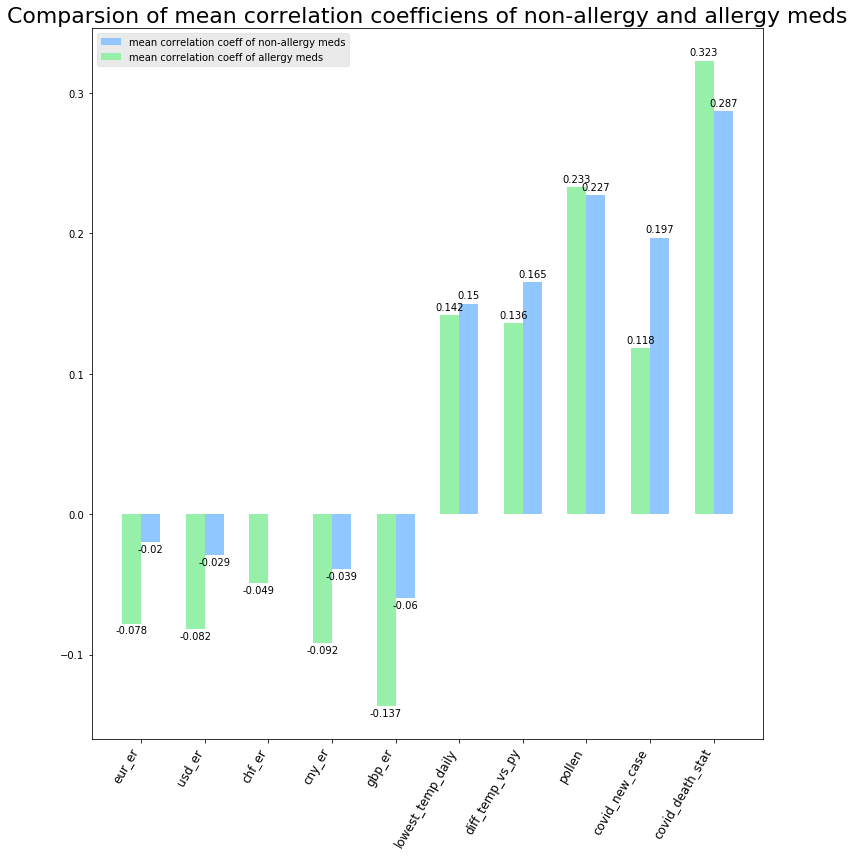

In [80]:
#Visualization
#Comparsion mean correlation coefficiens of each data type by allegy and non-allergy medicines
labels=list(benu_merged.columns[1:11])
mean_corr_coeff_nonallergy=column_means_v2
mean_corr_coeff_allergy=column_means_v3


x=np.arange(len(labels))
width=0.3

fig,ax=plt.subplots(figsize=(12, 12))
plt.style.use('ggplot')

#colors
colors = ['#66b3ff','#ffcc99']

rects1 = ax.bar(x+width/2, mean_corr_coeff_nonallergy, width, label='mean correlation coeff of non-allergy meds')
rects2 = ax.bar(x-width/2, mean_corr_coeff_allergy, width, label='mean correlation coeff of allergy meds')



# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('Comparsion of mean correlation coefficiens of non-allergy and allergy meds', size=22)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=60, size=12, ha='right')

ax.legend(loc='upper left')


def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height
    for rect in rects:
        height = rect.get_height()
        if height>0:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        if height<0:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -12),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('barchart_mean_corr_coeffs_allergy_nonallergy.png')
plt.show()


# Create top3 correlation list

In [81]:
import pandas as pd
correlation_values=[]
# top3_per_product_df=pd.DataFrame(columns=['product_name','column_name','top3_per_product'])
for i in range(len(benu_correlation_summary_table)):
    correlation_values_per_column=[]
    for j in range(len(benu_correlation_summary_table.columns)-2):
        correlation_values_per_column.append(benu_correlation_summary_table.iloc[i][j+1])
    correlation_values.append(pd.Series(correlation_values_per_column).nlargest(3))
correlation_values

[9    0.673306
 7    0.646521
 6    0.441586
 dtype: float64,
 9    0.673306
 7    0.646521
 6    0.441586
 dtype: float64,
 5    0.065220
 6    0.055625
 3   -0.162203
 dtype: float64,
 9    0.473054
 8    0.298593
 7    0.081191
 dtype: float64,
 9    0.277590
 8    0.213163
 2    0.175572
 dtype: float64,
 8    0.510983
 9    0.156957
 1    0.118534
 dtype: float64,
 4    0.049318
 3   -0.003943
 0   -0.018667
 dtype: float64,
 0    0.130700
 4    0.126421
 3    0.124619
 dtype: float64,
 9    0.634344
 7    0.629720
 6    0.439849
 dtype: float64,
 8    0.539686
 9    0.189175
 1    0.120263
 dtype: float64,
 8    0.881583
 9    0.653312
 7    0.427483
 dtype: float64,
 9    0.277590
 8    0.213163
 2    0.175572
 dtype: float64,
 8    0.777278
 9    0.531459
 7    0.352582
 dtype: float64,
 4    0.051238
 0   -0.008973
 3   -0.015024
 dtype: float64,
 4    0.041699
 0   -0.016232
 3   -0.023679
 dtype: float64,
 9    0.787104
 7    0.688989
 8    0.562255
 dtype: float64,
 4    0.

In [82]:
len(correlation_values)
len(benu_correlation_summary_table['product_name'])

30

In [83]:
top3_per_product_df=pd.DataFrame()
indexes_to_add=[]
values_to_add=[]
for i in range(len(correlation_values)):
    column_indexes=[]
    column_values=[]
    for j in range(len(correlation_values[i].index)):
        column_indexes.append(correlation_values[i].index[j])
        column_values.append(correlation_values[i].values[j])
    indexes_to_add.append(column_indexes)
    values_to_add.append(column_values)  
indexes_to_add
values_to_add

top3_per_product_df['top3_correlation_columns']=indexes_to_add
top3_per_product_df['top3_correlation_values']=values_to_add
top3_per_product_df['product_category']=benu_merged['product_category']
top3_per_product_df['date']=benu_merged['date']
top3_per_product_df

,top3_correlation_columns,top3_correlation_values,product_category,date
0,"[9, 7, 6]","[0.6733063033829946, 0.6465211140320009, 0.441...",Köhögéscsillapító,12/02/2021
1,"[9, 7, 6]","[0.6733063033829946, 0.6465211140320009, 0.441...",Köhögéscsillapító,12/02/2021
2,"[5, 6, 3]","[0.06521986381848677, 0.05562459864899379, -0....",Köhögéscsillapító,12/02/2021
3,"[9, 8, 7]","[0.47305419135556837, 0.2985931601755642, 0.08...",Allergia,12/02/2021
4,"[9, 8, 2]","[0.27759024631941537, 0.2131631462111189, 0.17...",Köhögéscsillapító,12/02/2021
5,"[8, 9, 1]","[0.5109829328102818, 0.15695716040849098, 0.11...",Köhögéscsillapító,12/02/2021
6,"[4, 3, 0]","[0.04931841748926679, -0.003943494775918503, -...",Köhögéscsillapító,12/02/2021
7,"[0, 4, 3]","[0.13070026864811493, 0.12642134797990862, 0.1...",Allergia,12/02/2021
8,"[9, 7, 6]","[0.6343437978061354, 0.6297203752762538, 0.439...",Allergia,12/02/2021
9,"[8, 9, 1]","[0.5396856479135933, 0.18917462580799985, 0.12...",Allergia,12/02/2021


In [84]:
product_names_x3=[]
for i in (benu_correlation_summary_table['product_name']):
    product_names_x3.extend([i, i,i])
product_names_x3

['ACC 100 mg granulátum gyermekeknek 30x3g',
 'ACC 100 mg granulátum gyermekeknek 30x3g',
 'ACC 100 mg granulátum gyermekeknek 30x3g',
 'ACC 20 mg/ml belsőleges oldat 100ml',
 'ACC 20 mg/ml belsőleges oldat 100ml',
 'ACC 20 mg/ml belsőleges oldat 100ml',
 'ACC 200 granulátum 30x3g',
 'ACC 200 granulátum 30x3g',
 'ACC 200 granulátum 30x3g',
 'Allergodil oldatos orrspray 10ml',
 'Allergodil oldatos orrspray 10ml',
 'Allergodil oldatos orrspray 10ml',
 'Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 100ml',
 'Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 100ml',
 'Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 100ml',
 'Daedalon 50 mg tabletta 10x',
 'Daedalon 50 mg tabletta 10x',
 'Daedalon 50 mg tabletta 10x',
 'Dorithricin szopogató tabletta erdei gyümölcs ízű 20x',
 'Dorithricin szopogató tabletta erdei gyümölcs ízű 20x',
 'Dorithricin szopogató tabletta erdei gyümölcs ízű 20x',
 'Grippostad C kemény kapszula 20x',
 'Grippostad C kemény kapszula 20x',
 'Grippostad C kemény kapszula 20x',
 

In [85]:
len(product_names_x3)

90

In [86]:
product_category_x3=[]
for i in (benu_merged['product_category']):
    product_category_x3.extend([i, i,i])
product_category_x3

['Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Allergia',
 'Allergia',
 'Allergia',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Allergia',
 'Allergia',
 'Allergia',
 'Allergia',
 'Allergia',
 'Allergia',
 'Allergia',
 'Allergia',
 'Allergia',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'üres',
 'üres',
 'üres',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Köhögéscsillapító',
 'Torokfertőtlenítők',
 'Torokfertőtlenítők',
 'Torokfertőtlenítők',
 'Köhögéscsillapító',


In [87]:
date_x3=[]
for i in (benu_merged['date']):
    date_x3.extend([i, i,i])
date_x3

['12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/2021',
 '12/02/20

In [88]:
t3_df=pd.DataFrame(columns=['product_names','column_indexes', 'columns','correlation_value','product_category'])
t3_df['product_names']=product_names_x3
t3_df['product_category']=product_category_x3
t3_df['date']=date_x3
t3_df

,product_names,column_indexes,columns,correlation_value,product_category,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,NaN,NaN,NaN,Köhögéscsillapító,12/02/2021
1,ACC 100 mg granulátum gyermekeknek 30x3g,NaN,NaN,NaN,Köhögéscsillapító,12/02/2021
2,ACC 100 mg granulátum gyermekeknek 30x3g,NaN,NaN,NaN,Köhögéscsillapító,12/02/2021
3,ACC 20 mg/ml belsőleges oldat 100ml,NaN,NaN,NaN,Köhögéscsillapító,12/02/2021
4,ACC 20 mg/ml belsőleges oldat 100ml,NaN,NaN,NaN,Köhögéscsillapító,12/02/2021
...,...,...,...,...,...,...
85,Wick Vaporub kenőcs 50g,NaN,NaN,NaN,Torokfertőtlenítők,12/02/2021
86,Wick Vaporub kenőcs 50g,NaN,NaN,NaN,Torokfertőtlenítők,12/02/2021
87,Zilola 5 mg filmtabletta 28x,NaN,NaN,NaN,Köhögéscsillapító,12/02/2021
88,Zilola 5 mg filmtabletta 28x,NaN,NaN,NaN,Köhögéscsillapító,12/02/2021


In [89]:
indexes_to_add=[]
values_to_add=[]
for i in range(len(correlation_values)):
    for j in range(len(correlation_values[i])):
        indexes_to_add.append(correlation_values[i].index[j])
        values_to_add.append(correlation_values[i].values[j])
indexes_to_add
t3_df['column_indexes']=indexes_to_add
t3_df['correlation_value']=values_to_add
t3_df

,product_names,column_indexes,columns,correlation_value,product_category,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,9,NaN,0.673306,Köhögéscsillapító,12/02/2021
1,ACC 100 mg granulátum gyermekeknek 30x3g,7,NaN,0.646521,Köhögéscsillapító,12/02/2021
2,ACC 100 mg granulátum gyermekeknek 30x3g,6,NaN,0.441586,Köhögéscsillapító,12/02/2021
3,ACC 20 mg/ml belsőleges oldat 100ml,9,NaN,0.673306,Köhögéscsillapító,12/02/2021
4,ACC 20 mg/ml belsőleges oldat 100ml,7,NaN,0.646521,Köhögéscsillapító,12/02/2021
...,...,...,...,...,...,...
85,Wick Vaporub kenőcs 50g,9,NaN,0.575761,Torokfertőtlenítők,12/02/2021
86,Wick Vaporub kenőcs 50g,7,NaN,0.352582,Torokfertőtlenítők,12/02/2021
87,Zilola 5 mg filmtabletta 28x,8,NaN,0.467187,Köhögéscsillapító,12/02/2021
88,Zilola 5 mg filmtabletta 28x,9,NaN,0.132273,Köhögéscsillapító,12/02/2021


In [90]:
column_names_to_add=[]
for i in range(len(t3_df['column_indexes'])):
    column_names_to_add.append(columns[t3_df['column_indexes'].iloc[i]])
t3_df['columns']=column_names_to_add
t3_df

,product_names,column_indexes,columns,correlation_value,product_category,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,9,covid_death_stat,0.673306,Köhögéscsillapító,12/02/2021
1,ACC 100 mg granulátum gyermekeknek 30x3g,7,pollen,0.646521,Köhögéscsillapító,12/02/2021
2,ACC 100 mg granulátum gyermekeknek 30x3g,6,diff_temp_vs_py,0.441586,Köhögéscsillapító,12/02/2021
3,ACC 20 mg/ml belsőleges oldat 100ml,9,covid_death_stat,0.673306,Köhögéscsillapító,12/02/2021
4,ACC 20 mg/ml belsőleges oldat 100ml,7,pollen,0.646521,Köhögéscsillapító,12/02/2021
...,...,...,...,...,...,...
85,Wick Vaporub kenőcs 50g,9,covid_death_stat,0.575761,Torokfertőtlenítők,12/02/2021
86,Wick Vaporub kenőcs 50g,7,pollen,0.352582,Torokfertőtlenítők,12/02/2021
87,Zilola 5 mg filmtabletta 28x,8,covid_new_case,0.467187,Köhögéscsillapító,12/02/2021
88,Zilola 5 mg filmtabletta 28x,9,covid_death_stat,0.132273,Köhögéscsillapító,12/02/2021


In [91]:
t3_df['product_names'].unique()

array(['ACC 100 mg granulátum gyermekeknek 30x3g',
       'ACC 20 mg/ml belsőleges oldat 100ml', 'ACC 200 granulátum 30x3g',
       'Allergodil oldatos orrspray 10ml',
       'Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 100ml',
       'Daedalon 50 mg tabletta 10x',
       'Dorithricin szopogató tabletta erdei gyümölcs ízű 20x',
       'Grippostad C kemény kapszula 20x', 'Halixol 30 mg tabletta 20x',
       'Inaller 5 mg filmtabletta 30x', 'Mucofree 15 mg pasztilla 20x',
       'Mucofree 30 mg/5 ml szirup 100ml',
       'Nasivin Kids 0,25 mg/ml oldatos orrcsepp 10ml',
       'Nasopax orrspray felnőtteknek 10ml',
       'Otrivin Rapid 1 mg/ml adagoló oldatos orrspray (0,1%) 10ml',
       'Otrivin Rapid 1 mg/ml oldatos orrcsepp (0,1%) 10ml',
       'Otrivin Rapid Menthol 1 mg/ml adagoló oldatos orrspray 10ml',
       'Rhinospray Plus orrspray 10ml',
       'Robitussin Antitussicum szirup 100ml',
       'Robitussin Expectorans szirup 100ml',
       'Robitussin Junior szirup 100ml', 'Septo

In [92]:
#Write Top3 to excel
# create excel writer object
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y")
writer = pd.ExcelWriter(dt_string+'top3_correlation_summary'+'.xlsx')
# write dataframe to excel
t3_df.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [93]:
#Correlations that are higher than 0.5 should be only considered
r05=t3_df[t3_df['correlation_value']>0.5]
r05

,product_names,column_indexes,columns,correlation_value,product_category,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,9,covid_death_stat,0.673306,Köhögéscsillapító,12/02/2021
1,ACC 100 mg granulátum gyermekeknek 30x3g,7,pollen,0.646521,Köhögéscsillapító,12/02/2021
3,ACC 20 mg/ml belsőleges oldat 100ml,9,covid_death_stat,0.673306,Köhögéscsillapító,12/02/2021
4,ACC 20 mg/ml belsőleges oldat 100ml,7,pollen,0.646521,Köhögéscsillapító,12/02/2021
15,Daedalon 50 mg tabletta 10x,8,covid_new_case,0.510983,Köhögéscsillapító,12/02/2021
24,Halixol 30 mg tabletta 20x,9,covid_death_stat,0.634344,Allergia,12/02/2021
25,Halixol 30 mg tabletta 20x,7,pollen,0.629720,Allergia,12/02/2021
27,Inaller 5 mg filmtabletta 30x,8,covid_new_case,0.539686,Allergia,12/02/2021
30,Mucofree 15 mg pasztilla 20x,8,covid_new_case,0.881583,Köhögéscsillapító,12/02/2021
31,Mucofree 15 mg pasztilla 20x,9,covid_death_stat,0.653312,Köhögéscsillapító,12/02/2021


In [94]:
len(r05)

38

In [95]:
# create excel writer object
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y")
writer = pd.ExcelWriter(dt_string+'r05'+'.xlsx')
# write dataframe to excel
r05.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [96]:
list(r05['columns'].unique())

['covid_death_stat', 'pollen', 'covid_new_case']

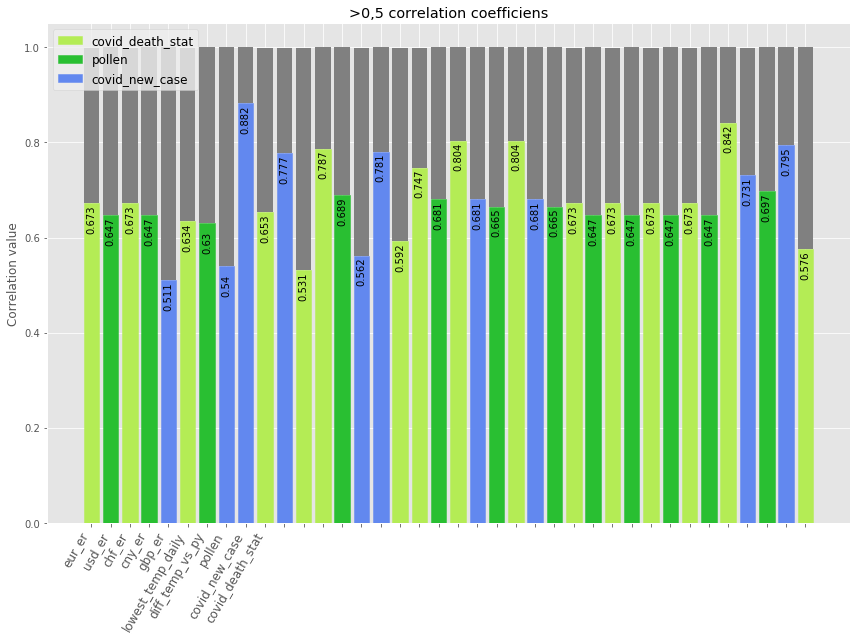

In [97]:
# #Visualization
plotdata = pd.DataFrame(columns=['corr_coef','max','xlabels'])
plotdata['corr_coef']=r05.correlation_value.round(3)

max_value=[]
for i in range(len(r05['correlation_value'])):
    max_value.append(1.0-float(r05['correlation_value'].iloc[i]))

plotdata['max']=max_value

plotdata['xlabels']=r05.product_names
#print(len(plotdata['xlabels']))

fig,ax=plt.subplots(figsize=(12,9))
#plt.style.use('ggplot')
plt.style.use("bmh")

x=np.arange(len(plotdata['xlabels']))
width=0.8

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=60, size=12, ha='right')

rect1=ax.bar(x,plotdata['corr_coef'], width)
rect2=ax.bar(x,plotdata['max'] , width, color="grey",bottom=plotdata['corr_coef'])

col_type=r05['columns'].unique()
#print(col_type)
plotdata['columns']=r05['columns']

number_of_colors = len(col_type)
color_list = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
#print(color_list)

plotdata.reset_index(drop=True,inplace=True)
#print(plotdata)
bar_list=rect1.get_children()

for i in range(len(plotdata)):
    for j in range(len(col_type)):
        if plotdata['columns'].iloc[i]==col_type[j]:
            bar_list[i].set_color(color_list[j])
            
            
def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -30),  # 3 points vertical offset
                    textcoords="offset points", rotation=90,
                    ha='center', va='bottom', color='black')


autolabel(rect1)
ax.set_ylabel('Correlation value')
ax.set_title('>0,5 correlation coefficiens')
ax.legend(bar_list[2:5], col_type,loc='upper left', fontsize=12)
#legend does not want to take the colors for covid_new_case..if i just use rect1..the current solution is not really dynamic...

fig.tight_layout()

plt.savefig('bar_chart_of_r05_corr_coeff.png')

In [98]:
#Correlations that are higher than 0.7 should be only considered-> +0.70. A strong uphill (positive) linear relationship
r07=t3_df[t3_df['correlation_value']>0.7]
r07

,product_names,column_indexes,columns,correlation_value,product_category,date
30,Mucofree 15 mg pasztilla 20x,8,covid_new_case,0.881583,Köhögéscsillapító,12/02/2021
36,"Nasivin Kids 0,25 mg/ml oldatos orrcsepp 10ml",8,covid_new_case,0.777278,Köhögéscsillapító,12/02/2021
45,"Otrivin Rapid 1 mg/ml oldatos orrcsepp (0,1%) ...",9,covid_death_stat,0.787104,Köhögéscsillapító,12/02/2021
51,Rhinospray Plus orrspray 10ml,8,covid_new_case,0.780783,Köhögéscsillapító,12/02/2021
54,Robitussin Antitussicum szirup 100ml,9,covid_death_stat,0.747432,Köhögéscsillapító,12/02/2021
57,Robitussin Expectorans szirup 100ml,9,covid_death_stat,0.804048,Köhögéscsillapító,12/02/2021
60,Robitussin Junior szirup 100ml,9,covid_death_stat,0.804048,Köhögéscsillapító,12/02/2021
81,Vibrocil oldatos orrcsepp 15ml,9,covid_death_stat,0.842116,Hányinger ellen,12/02/2021
82,Vibrocil oldatos orrcsepp 15ml,8,covid_new_case,0.731446,Hányinger ellen,12/02/2021
84,Wick Vaporub kenőcs 50g,8,covid_new_case,0.794791,Torokfertőtlenítők,12/02/2021


In [99]:
len(r07)

10

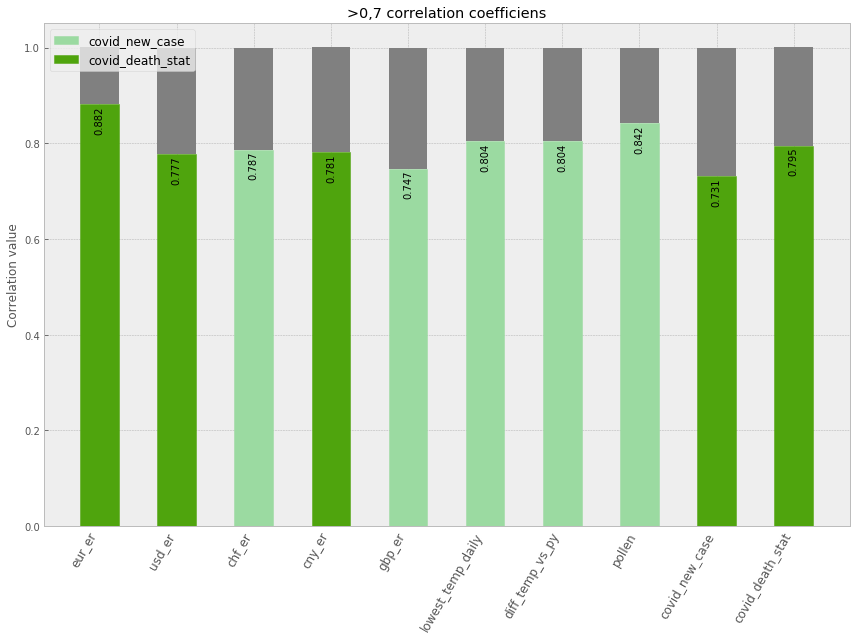

In [100]:
# #Visualization
plotdata = pd.DataFrame(columns=['corr_coef','max','xlabels'])
plotdata['corr_coef']=r07.correlation_value.round(3)

max_value=[]
for i in range(len(r07['correlation_value'])):
    max_value.append(1.0-float(r07['correlation_value'].iloc[i]))

plotdata['max']=max_value

plotdata['xlabels']=r07.product_names
#print(len(plotdata['xlabels']))

fig,ax=plt.subplots(figsize=(12,9))
#plt.style.use('ggplot')
plt.style.use("bmh")

x=np.arange(len(plotdata['xlabels']))
width=0.5

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=60, size=12, ha='right')

col_type=r07['columns'].unique()
#print(col_type)
plotdata['columns']=r07['columns']

number_of_colors = len(col_type)
color_list = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
#print(color_list)


rect1=ax.bar(x,plotdata['corr_coef'], width)
rect2=ax.bar(x,plotdata['max'] , width, color="grey",bottom=plotdata['corr_coef'])


plotdata.reset_index(drop=True,inplace=True)
#print(plotdata)
bar_list=rect1.get_children()

for i in range(len(plotdata)):
    for j in range(len(col_type)):
        if plotdata['columns'].iloc[i]==col_type[j]:
            bar_list[i].set_color(color_list[j])
            
            
def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -30),  # 3 points vertical offset
                    textcoords="offset points", rotation=90,
                    ha='center', va='bottom', color='black')


autolabel(rect1)
ax.set_ylabel('Correlation value')
ax.set_title('>0,7 correlation coefficiens')
ax.legend(bar_list[2:5], col_type,loc='upper left', fontsize=12)
#legend does not want to take the colors for covid_new_case..if i just use rect1..the current solution is not really dynamic...

fig.tight_layout()

plt.savefig('bar_chart_of_r07_corr_coeff.png')

In [101]:
# create excel writer object
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y")
writer = pd.ExcelWriter(dt_string+'r07'+'.xlsx')
# write dataframe to excel
r07.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [102]:
#Extra visualization r05 of 24/08/2020 and 02/09/2020
r05_comparsion=pd.read_excel('24082020_02092020_r05.xlsx')
r05_comparsion

,product_names,columns_2020_08_24,correlation_values_2020_08_24,columns_2020_09_02,correlation_value_2020_09_02
0,ACC 100 mg granulátum gyermekeknek 30x3g,covid_death_stat,0.794422,covid_death_stat,0.776909
1,ACC 100 mg granulátum gyermekeknek 30x3g,chf_er,0.611274,pollen,0.604919
2,ACC 100 mg granulátum gyermekeknek 30x3g,covid_new_case,0.610758,chf_er,0.558457
3,ACC 20 mg/ml belsőleges oldat 100ml,covid_death_stat,0.794422,covid_death_stat,0.776909
4,ACC 20 mg/ml belsőleges oldat 100ml,chf_er,0.611274,pollen,0.604919
5,ACC 20 mg/ml belsőleges oldat 100ml,covid_new_case,0.610758,chf_er,0.558457
6,ACC 200 granulátum 30x3g,covid_death_stat,0.864833,covid_death_stat,0.877781
7,ACC 200 granulátum 30x3g,covid_new_case,0.619388,usd_er,0.710389
8,ACC 200 granulátum 30x3g,usd_er,0.523163,cny_er,0.671356
9,Grippostad C kemény kapszula 20x,covid_death_stat,0.744875,covid_death_stat,0.729472


In [103]:
type(r05_comparsion.correlation_values_2020_08_24.iloc[0])

numpy.float64

In [104]:
type(r05_comparsion.correlation_value_2020_09_02.iloc[0])

numpy.float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


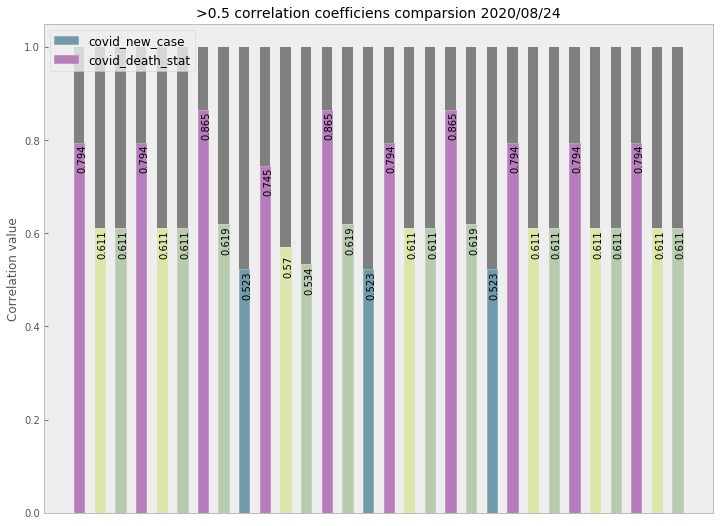

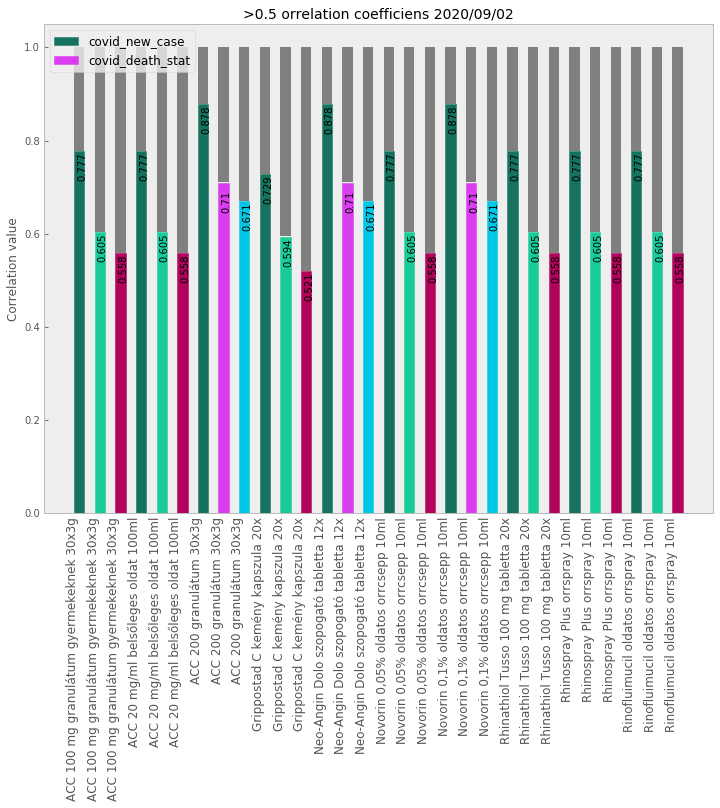

In [105]:
# #Visualization
plotdata1 = r05_comparsion[['product_names','columns_2020_08_24','correlation_values_2020_08_24']]
plotdata2 = r05_comparsion[['product_names','columns_2020_09_02','correlation_value_2020_09_02']]
plotdata2['correlation_value_2020_09_02']

max_value_1=[]
for i in range(len(plotdata1)):
    max_value_1.append(1.0-(plotdata1['correlation_values_2020_08_24'].iloc[i]))
    
max_value_2=[]
for i in range(len(plotdata2)):
    max_value_2.append(1.0-(plotdata2['correlation_value_2020_09_02'].iloc[i]))    

              
plotdata1['max_1']=max_value_1
plotdata2['max_2']=max_value_2

fig,ax1=plt.subplots(figsize=(12,9))
fig,ax2=plt.subplots(figsize=(12,9))

#plt.style.use('ggplot')
plt.style.use("bmh")

x1=np.arange(len(plotdata1['product_names']))
width=0.5

x2=np.arange(len(plotdata2['product_names']))
width=0.5

ax1.set_xticks(x1)
ax1.set_xticklabels(plotdata1['product_names'], rotation=60, size=12, ha='right')
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.grid(None)

ax2.set_xticks(x2)
ax2.set_xticklabels(plotdata2['product_names'], rotation=90, size=12, ha='right')
ax2.grid(None)

col_type_1=plotdata1['columns_2020_08_24'].unique()
col_type_2=plotdata2['columns_2020_09_02'].unique()


number_of_colors_1 = len(col_type_1)
color_list_1 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors_1)]

number_of_colors_2 = len(col_type_2)
color_list_2 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors_2)]

rect1=ax1.bar(x1,plotdata1['correlation_values_2020_08_24'].round(3), width)
rect2=ax1.bar(x1,plotdata1['max_1'] , width, color="grey",bottom=plotdata1['correlation_values_2020_08_24'])

rect3=ax2.bar(x2,plotdata2['correlation_value_2020_09_02'].round(3), width)
rect4=ax2.bar(x2,plotdata2['max_2'] , width, color="grey",bottom=plotdata2['correlation_value_2020_09_02'])



plotdata1.reset_index(drop=True,inplace=True)
plotdata2.reset_index(drop=True,inplace=True)
#print(plotdata1)
bar_list_1=rect1.get_children()
bar_list_3=rect3.get_children()

for i in range(len(plotdata1)):
    for j in range(len(col_type_1)):
        if plotdata1['columns_2020_08_24'].iloc[i]==col_type_1[j]:
            bar_list_1[i].set_color(color_list_1[j])
                                                                          
for i in range(len(plotdata2)):
    for j in range(len(col_type_2)):
        if plotdata2['columns_2020_09_02'].iloc[i]==col_type_2[j]:
            bar_list_3[i].set_color(color_list_2[j])                                                                    
            
            
def autolabel1(rects):
    #Attach a text label above each bar in *rects*, displaying its height
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, -30),  # 3 points vertical offset
                    textcoords="offset points", rotation=90,
                    ha='center', va='bottom', color='black')

def autolabel2(rects):
    #Attach a text label above each bar in *rects*, displaying its height
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, -30),  # 3 points vertical offset
                    textcoords="offset points", rotation=90,
                    ha='center', va='bottom', color='black')
autolabel1(rect1)
autolabel2(rect3)
                                                                          
ax1.set_ylabel('Correlation value')
ax1.set_title('>0.5 correlation coefficiens comparsion 2020/08/24', size=14)
ax1.legend(bar_list_1[8:12], col_type,loc='upper left', fontsize=12)
# #legend does not want to take the colors for covid_new_case..if i just use rect1..the current solution is not really dynamic...

ax2.set_ylabel('Correlation value')
ax2.set_title('>0.5 orrelation coefficiens 2020/09/02', size=14)
ax2.legend(bar_list_3[6:10], col_type,loc='upper left', fontsize=12)                                                                         
                                                                          
#fig.tight_layout()

plt.savefig('bar_chart_of_corr_coeff_comparsion_2408_0209.png')

# CALCULATING LATEST PRICE AND MEAN PRICE PER PRODUCT

In [106]:
#Calculating mean price and latest price - This is good for the modell evaluation and keep it as possible source of future calc
# r05_list_of_prices=r05['pri']
# r05_list_of_prices
r05

,product_names,column_indexes,columns,correlation_value,product_category,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,9,covid_death_stat,0.673306,Köhögéscsillapító,12/02/2021
1,ACC 100 mg granulátum gyermekeknek 30x3g,7,pollen,0.646521,Köhögéscsillapító,12/02/2021
3,ACC 20 mg/ml belsőleges oldat 100ml,9,covid_death_stat,0.673306,Köhögéscsillapító,12/02/2021
4,ACC 20 mg/ml belsőleges oldat 100ml,7,pollen,0.646521,Köhögéscsillapító,12/02/2021
15,Daedalon 50 mg tabletta 10x,8,covid_new_case,0.510983,Köhögéscsillapító,12/02/2021
24,Halixol 30 mg tabletta 20x,9,covid_death_stat,0.634344,Allergia,12/02/2021
25,Halixol 30 mg tabletta 20x,7,pollen,0.629720,Allergia,12/02/2021
27,Inaller 5 mg filmtabletta 30x,8,covid_new_case,0.539686,Allergia,12/02/2021
30,Mucofree 15 mg pasztilla 20x,8,covid_new_case,0.881583,Köhögéscsillapító,12/02/2021
31,Mucofree 15 mg pasztilla 20x,9,covid_death_stat,0.653312,Köhögéscsillapító,12/02/2021


In [107]:
r05_v2=r05.copy()

In [108]:
#Filtering list_of_prices based on r05 product names
r05_list_of_prices_v2=[]
for i in range(len(product_names)):
    for j in range(len(r05)):
        if product_names[i]==str(r05['product_names'].iloc[j]):
            r05_list_of_prices_v2.append(list_of_prices[i])
len(r05_list_of_prices_v2)

38

In [109]:
#calculate latest price and mean price
latest_price_per_product=[]
mean_price_per_product=[]
for i in range(len(r05_list_of_prices_v2)):
    latest_price_per_product.append(r05_list_of_prices_v2[i][-1])
    mean_price_per_product.append(np.mean(r05_list_of_prices_v2[i]).round(2))

In [110]:
#Add latest price and mean price to dataframe
r05_v2['latest_price']=latest_price_per_product
r05_v2['mean_price']=mean_price_per_product
r05_v2
r05_v3=r05_v2.drop(columns=['column_indexes', 'date'])
r05_v3

,product_names,columns,correlation_value,product_category,latest_price,mean_price
0,ACC 100 mg granulátum gyermekeknek 30x3g,covid_death_stat,0.673306,Köhögéscsillapító,1699,1667.09
1,ACC 100 mg granulátum gyermekeknek 30x3g,pollen,0.646521,Köhögéscsillapító,1699,1667.09
3,ACC 20 mg/ml belsőleges oldat 100ml,covid_death_stat,0.673306,Köhögéscsillapító,1699,1667.09
4,ACC 20 mg/ml belsőleges oldat 100ml,pollen,0.646521,Köhögéscsillapító,1699,1667.09
15,Daedalon 50 mg tabletta 10x,covid_new_case,0.510983,Köhögéscsillapító,1599,1707.51
24,Halixol 30 mg tabletta 20x,covid_death_stat,0.634344,Allergia,1149,1139.43
25,Halixol 30 mg tabletta 20x,pollen,0.629720,Allergia,1149,1139.43
27,Inaller 5 mg filmtabletta 30x,covid_new_case,0.539686,Allergia,1449,1692.62
30,Mucofree 15 mg pasztilla 20x,covid_new_case,0.881583,Köhögéscsillapító,1699,1613.89
31,Mucofree 15 mg pasztilla 20x,covid_death_stat,0.653312,Köhögéscsillapító,1699,1613.89


In [111]:
#caluclate mean price for r07 data
r07_list_of_mean_price=[]
for i in range(len(r05_v3)):
    for j in range(len(r07.product_names)):
#         print(r05_v3.product_names.iloc[i])
#         print(r07.product_names.iloc[j])
        if str(r05_v3.product_names.iloc[i])==str(r07.product_names.iloc[j]):
            r07_list_of_mean_price.append(r05_v3.mean_price.iloc[i])
r07_list_of_mean_price               

[1613.89,
 1613.89,
 1709.64,
 1709.64,
 1635.17,
 1635.17,
 1635.17,
 2118.15,
 2118.15,
 2163.89,
 2163.89,
 2195.81,
 2195.81,
 2195.81,
 2195.81,
 2195.81,
 2195.81,
 1445.81,
 1445.81,
 1445.81,
 1445.81,
 1445.81,
 1445.81,
 2509.64,
 2509.64]

# SIMPLE LINEAR REGERSSION - FOR A SINGLE PRODUCT

In [112]:
#Simple Linear Regression - beetween price as dependent and covid_death_stat as independent variable

In [113]:
covid_death_stat

array([596, 596, 596, 596, 596, 596, 596, 597, 597, 597, 598, 599, 600,
       602, 602, 602, 605, 605, 605, 607, 607, 607, 608, 608, 609, 609,
       609, 611, 611, 613, 613, 614, 614, 614, 614, 614, 614, 615, 616,
       619, 620, 621, 624, 624, 625, 626, 628, 630])

In [114]:
X = np.array(covid_death_stat[0:array_len]).reshape(-1, 1)
y = np.array(list_of_prices[0][0:array_len]).reshape(-1, 1)

In [115]:
X

array([[596],
       [596],
       [596],
       [596],
       [596],
       [596],
       [596],
       [597],
       [597],
       [597],
       [598],
       [599],
       [600],
       [602],
       [602],
       [602],
       [605],
       [605],
       [605],
       [607],
       [607],
       [607],
       [608],
       [608],
       [609],
       [609],
       [609],
       [611],
       [611],
       [613],
       [613],
       [614],
       [614],
       [614],
       [614],
       [614],
       [614],
       [615],
       [616],
       [619],
       [620],
       [621],
       [624],
       [624],
       [625],
       [626],
       [628]])

In [116]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [117]:
#Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)

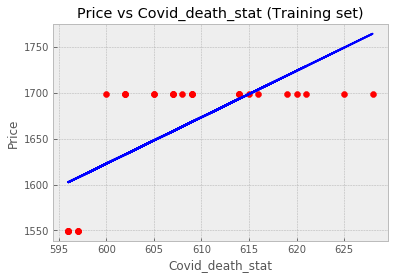

In [119]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Price vs Covid_death_stat (Training set)')
plt.xlabel('Covid_death_stat')
plt.ylabel('Price')
plt.show()

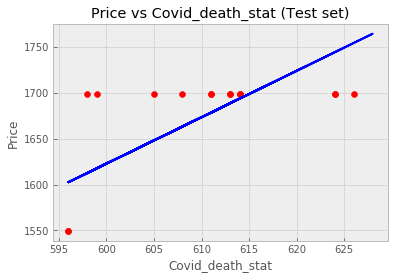

In [120]:
 #Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Price vs Covid_death_stat (Test set)')
plt.xlabel('Covid_death_stat')
plt.ylabel('Price')
plt.show()

In [121]:
regression_temp_df=pd.DataFrame(columns=['list_of_prices','covid_death_stat'])
regression_temp_df['list_of_prices']=np.array(list_of_prices[0][0:array_len])
regression_temp_df['covid_death_stat']=np.array(covid_death_stat[0:array_len])
regression_temp_df


,list_of_prices,covid_death_stat
0,1549,596
1,1549,596
2,1549,596
3,1549,596
4,1549,596
5,1549,596
6,1549,596
7,1549,597
8,1549,597
9,1549,597


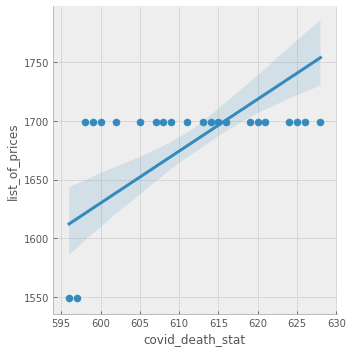

In [122]:
sns.lmplot(x="covid_death_stat", y="list_of_prices", data=regression_temp_df, x_estimator=np.mean);

# SIMPLE LINEAR REGERSSION - FOR R07

In [123]:
#Lets return to simple linear regression for r07

In [124]:
r07

,product_names,column_indexes,columns,correlation_value,product_category,date
30,Mucofree 15 mg pasztilla 20x,8,covid_new_case,0.881583,Köhögéscsillapító,12/02/2021
36,"Nasivin Kids 0,25 mg/ml oldatos orrcsepp 10ml",8,covid_new_case,0.777278,Köhögéscsillapító,12/02/2021
45,"Otrivin Rapid 1 mg/ml oldatos orrcsepp (0,1%) ...",9,covid_death_stat,0.787104,Köhögéscsillapító,12/02/2021
51,Rhinospray Plus orrspray 10ml,8,covid_new_case,0.780783,Köhögéscsillapító,12/02/2021
54,Robitussin Antitussicum szirup 100ml,9,covid_death_stat,0.747432,Köhögéscsillapító,12/02/2021
57,Robitussin Expectorans szirup 100ml,9,covid_death_stat,0.804048,Köhögéscsillapító,12/02/2021
60,Robitussin Junior szirup 100ml,9,covid_death_stat,0.804048,Köhögéscsillapító,12/02/2021
81,Vibrocil oldatos orrcsepp 15ml,9,covid_death_stat,0.842116,Hányinger ellen,12/02/2021
82,Vibrocil oldatos orrcsepp 15ml,8,covid_new_case,0.731446,Hányinger ellen,12/02/2021
84,Wick Vaporub kenőcs 50g,8,covid_new_case,0.794791,Torokfertőtlenítők,12/02/2021


In [125]:
#Checking the len of unique product names in 
r07_product_names=r07['product_names'].unique()
r07_product_names
len(r07_product_names)

9

In [126]:
r07_product_names

array(['Mucofree 15 mg pasztilla 20x',
       'Nasivin Kids 0,25 mg/ml oldatos orrcsepp 10ml',
       'Otrivin Rapid 1 mg/ml oldatos orrcsepp (0,1%) 10ml',
       'Rhinospray Plus orrspray 10ml',
       'Robitussin Antitussicum szirup 100ml',
       'Robitussin Expectorans szirup 100ml',
       'Robitussin Junior szirup 100ml', 'Vibrocil oldatos orrcsepp 15ml',
       'Wick Vaporub kenőcs 50g'], dtype=object)

In [127]:
#Filtering list of prices to these product names
r07_list_of_prices=[]
for i in range(len(product_names)):
    for j in range(len(r07_product_names)):
        if product_names[i]==r07_product_names[j]:
            r07_list_of_prices.append(list_of_prices[i])
len(r07_list_of_prices)

9

In [128]:
r07_list_of_prices

[array([1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599,
        1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599,
        1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599,
        1599, 1599, 1599, 1599, 1599, 1599, 1699, 1699, 1699, 1699, 1699,
        1699, 1599, 1699]),
 array([1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1799, 1799, 1799, 1799,
        1799, 1699, 1699]),
 array([1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1649,
        1649, 1649, 1649, 1649, 1649, 1649, 1649, 1649, 1649, 1649, 1649,
        1649, 1649, 1649, 1649, 1649, 1649, 1649, 1649, 1649, 1649, 1649,
        1649, 1649, 1649, 1649, 1649, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1649, 1649]),
 array([2099, 2099, 2099, 20

In [129]:
len(r07_list_of_prices[0])

47

In [130]:
covid_death_stat[0:array_len]

array([596, 596, 596, 596, 596, 596, 596, 597, 597, 597, 598, 599, 600,
       602, 602, 602, 605, 605, 605, 607, 607, 607, 608, 608, 609, 609,
       609, 611, 611, 613, 613, 614, 614, 614, 614, 614, 614, 615, 616,
       619, 620, 621, 624, 624, 625, 626, 628])

In [131]:
array_len

47

In [132]:
r07_list_of_prices[0][0:array_len]

array([1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599,
       1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599,
       1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599,
       1599, 1599, 1599, 1599, 1599, 1599, 1699, 1699, 1699, 1699, 1699,
       1699, 1599, 1699])

In [133]:
len(covid_death_stat)

48

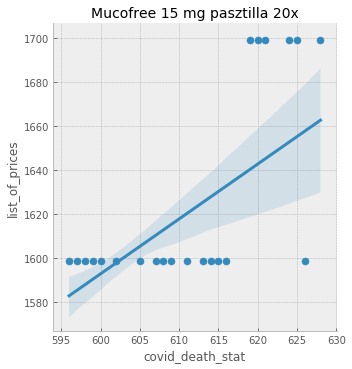

        y_pred  y_test
0  1621.643095    1599
1  1629.232282    1599
2  1626.702553    1599
3  1583.697162    1599
4  1606.464722    1599
5  1591.286349    1599
6  1654.529570    1699
7  1629.232282    1599
8  1614.053908    1599
9  1588.756620    1599


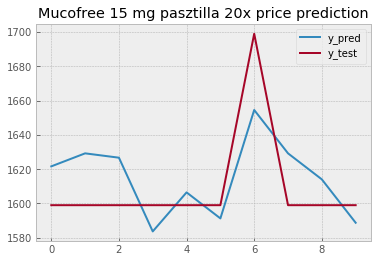

Mean Absolute Error: 21.10591406373867
Mean Squared Error: 576.668833638201
Root Mean Squared Error: 24.01392999153202
Mean Squared Error:576.668833638201 is higher than 10% of mean price:161.389


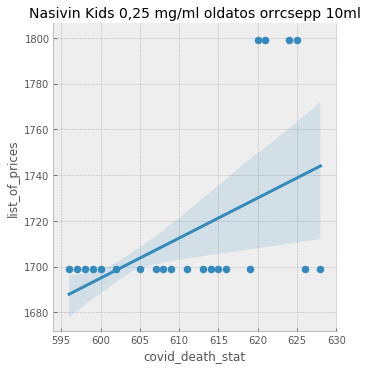

        y_pred  y_test
0  1713.996036    1699
1  1718.938164    1699
2  1717.290788    1699
3  1689.285397    1699
4  1704.111781    1699
5  1694.227525    1699
6  1735.411923    1799
7  1718.938164    1699
8  1709.053908    1699
9  1692.580149    1699


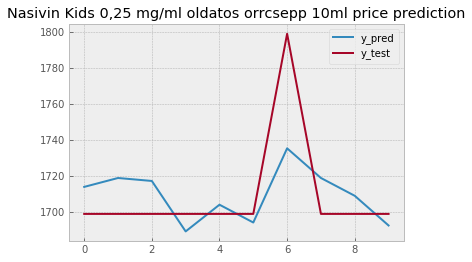

Mean Absolute Error: 17.282384651974006
Mean Squared Error: 568.3514178816667
Root Mean Squared Error: 23.840122019017997
Mean Squared Error:568.3514178816667 is higher than 10% of mean price:161.389


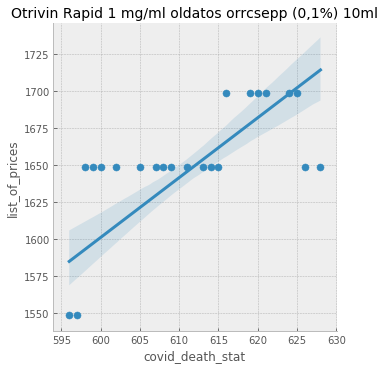

        y_pred  y_test
0  1643.682892    1649
1  1656.553116    1649
2  1652.263041    1649
3  1579.331774    1549
4  1617.942445    1649
5  1592.201998    1649
6  1699.453861    1699
7  1656.553116    1649
8  1630.812668    1649
9  1587.911923    1649


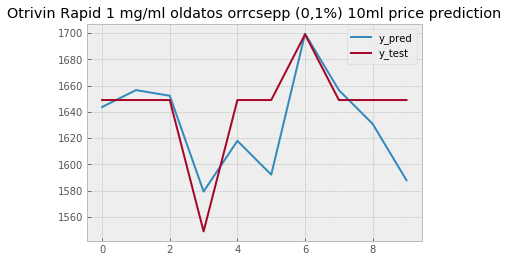

Mean Absolute Error: 22.160298081496784
Mean Squared Error: 932.6357634231211
Root Mean Squared Error: 30.53908583149013
Mean Squared Error:932.6357634231211 is higher than 10% of mean price:170.96400000000003


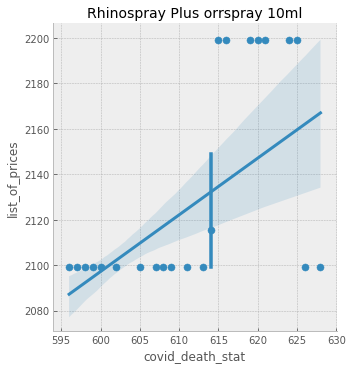

        y_pred  y_test
0  2127.054543    2099
1  2134.650864    2099
2  2132.118757    2099
3  2089.072935    2099
4  2111.861899    2099
5  2096.669256    2099
6  2159.971936    2199
7  2134.650864    2099
8  2119.458221    2099
9  2094.137149    2099


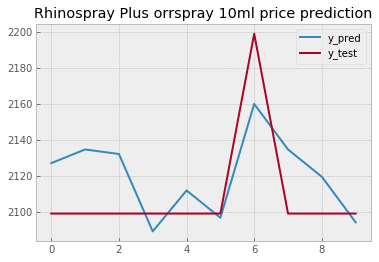

Mean Absolute Error: 22.194387188837755
Mean Squared Error: 666.0661000940432
Root Mean Squared Error: 25.808256432662073
Mean Squared Error:666.0661000940432 is higher than 10% of mean price:170.96400000000003


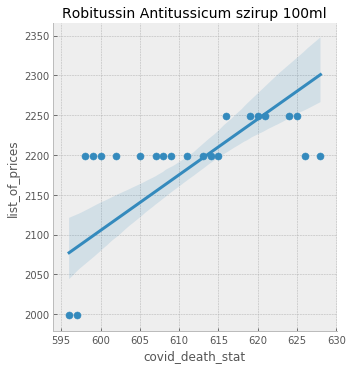

        y_pred  y_test
0  2177.491359    2199
1  2199.965197    2199
2  2192.473918    2199
3  2065.122166    1999
4  2132.543682    2199
5  2087.596004    2199
6  2274.877993    2249
7  2199.965197    2199
8  2155.017520    2199
9  2080.104725    2199


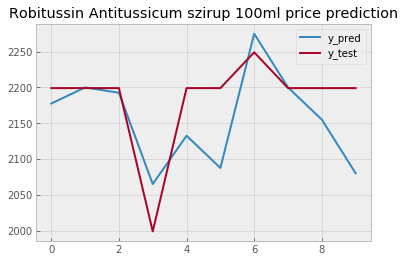

Mean Absolute Error: 46.270334548914164
Mean Squared Error: 3844.6723374815
Root Mean Squared Error: 62.00542183939643
Mean Squared Error:3844.6723374815 is higher than 10% of mean price:163.51700000000002


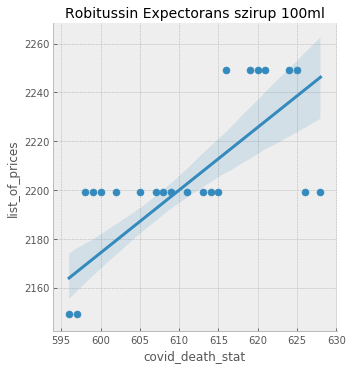

        y_pred  y_test
0  2201.778659    2199
1  2209.847075    2199
2  2207.157603    2199
3  2161.436578    2149
4  2185.641827    2199
5  2169.504994    2199
6  2236.741795    2249
7  2209.847075    2199
8  2193.710243    2199
9  2166.815522    2199


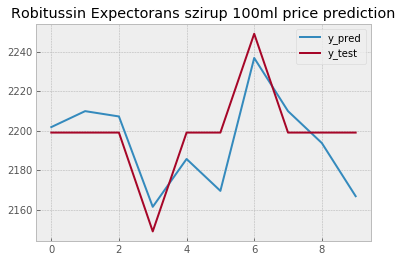

Mean Absolute Error: 13.76526082130972
Mean Squared Error: 272.6735839667103
Root Mean Squared Error: 16.512830888939373
Mean Squared Error:272.6735839667103 is higher than 10% of mean price:163.51700000000002


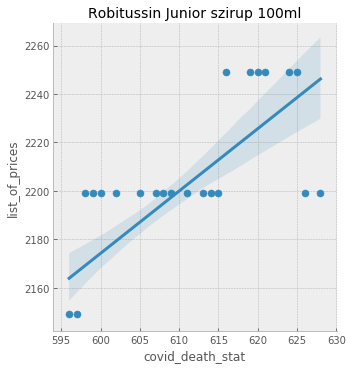

        y_pred  y_test
0  2201.778659    2199
1  2209.847075    2199
2  2207.157603    2199
3  2161.436578    2149
4  2185.641827    2199
5  2169.504994    2199
6  2236.741795    2249
7  2209.847075    2199
8  2193.710243    2199
9  2166.815522    2199


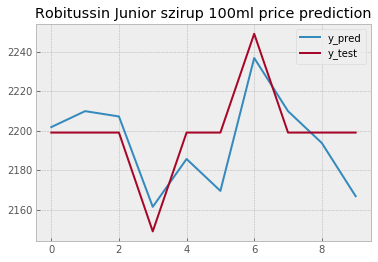

Mean Absolute Error: 13.76526082130972
Mean Squared Error: 272.6735839667103
Root Mean Squared Error: 16.512830888939373
Mean Squared Error:272.6735839667103 is higher than 10% of mean price:163.51700000000002


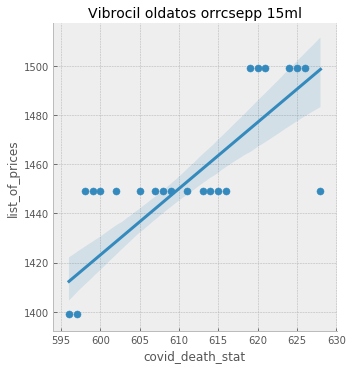

        y_pred  y_test
0  1452.151261    1449
1  1460.659664    1449
2  1457.823529    1449
3  1409.609244    1399
4  1435.134454    1449
5  1418.117647    1449
6  1489.021008    1499
7  1460.659664    1449
8  1443.642857    1449
9  1415.281513    1449


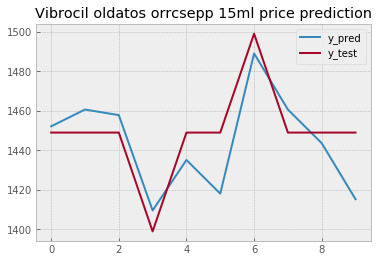

Mean Absolute Error: 13.970588235294121
Mean Squared Error: 288.34254289951315
Root Mean Squared Error: 16.98065201632473
Mean Squared Error:288.34254289951315 is higher than 10% of mean price:211.81500000000003


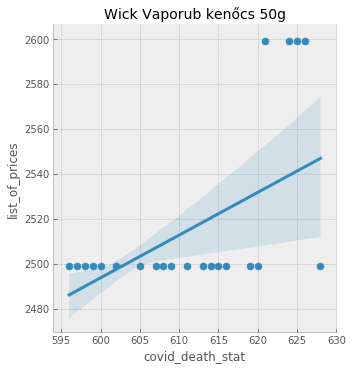

        y_pred  y_test
0  2514.443158    2499
1  2519.913271    2499
2  2518.089900    2499
3  2487.092596    2499
4  2503.502933    2499
5  2492.562708    2499
6  2538.146980    2599
7  2519.913271    2499
8  2508.973046    2499
9  2490.739337    2499


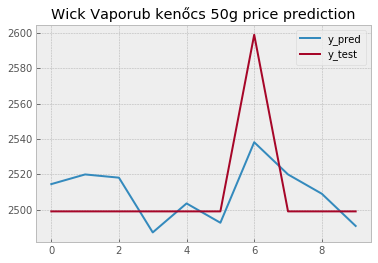

Mean Absolute Error: 17.829395909307095
Mean Squared Error: 555.1936939205134
Root Mean Squared Error: 23.56254854468237
Mean Squared Error:555.1936939205134 is higher than 10% of mean price:211.81500000000003
DataFrame is written successfully to Excel File.


In [134]:
model_results=pd.DataFrame(columns=['product_name','model','data','mean_squared_error','mean_10%','is_fitting'])
list_of_product_name_lr=[]
list_of_model_lr=[]
list_of_data_lr=[]
list_of_msr_lr=[]
list_of_mean_10_lr=[]
list_of_fitting_lr=[]

for i in range(len(r07_list_of_prices)):
    y = r07_list_of_prices[i][0:array_len].reshape(-1, 1)
    #print(y)
    X = covid_death_stat[0:array_len].reshape(-1, 1)
    #print(X)
    sl_regression_temp_df=pd.DataFrame(columns=['list_of_prices','covid_death_stat'])
    sl_regression_temp_df['list_of_prices']=np.array(r07_list_of_prices[i][0:array_len])
    sl_regression_temp_df['covid_death_stat']=np.array(covid_death_stat[0:array_len])
    sl_regression_temp_df
    sns.lmplot(x="covid_death_stat", y="list_of_prices", data=sl_regression_temp_df, x_estimator=np.mean);
    plt.title(str(r07_product_names[i]),size=14)
    plt.show()
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    #print(len(X_train))
    #print(len(X_test))
    #print(len(y_train))
    #print(len(y_test))
    #Training the Multiple Linear Regression model on the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    #Predicting the Test set results
    y_pred = regressor.predict(X_test)
    #print(tuple(y_pred.reshape(1, -1)[0]))
    #print(y_pred)
    #print(len(y_pred))
    np.set_printoptions(precision=2)
    
    #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    
    pred_vs_test=pd.DataFrame(columns=(['y_pred','y_test']))
    pred_vs_test['y_pred']=tuple(y_pred.reshape(1, -1)[0])
    pred_vs_test['y_test']=tuple(y_test.reshape(1, -1)[0])
    print(pred_vs_test)                     

    lines = pred_vs_test.plot.line()
    plt.title(str(r07_product_names[i])+" price prediction")
    plt.show()
    
    #Evaluating the modell
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    #error should be under 10% 
    if ((metrics.mean_squared_error(y_test, y_pred)/r07_list_of_mean_price[i])*100)<10:
        print(str(metrics.mean_squared_error(y_test, y_pred))+"is lower than 10% of mean price:"+str(r07_list_of_mean_price[i]*0.1))
        list_of_fitting_lr.append('yes')
    else: print("Mean Squared Error:"+str(metrics.mean_squared_error(y_test, y_pred))+" is higher than 10% of mean price:"+str(r07_list_of_mean_price[i]*0.1));list_of_fitting_lr.append('no')
    #mean is less than 10% of the mean price so the prediction is good one
    
    
    list_of_product_name_lr.append(str(r07_product_names[i]))
    list_of_model_lr.append('linear regression')
    list_of_data_lr.append('covid_death_stat')
    list_of_msr_lr.append(metrics.mean_squared_error(y_test, y_pred))
    list_of_mean_10_lr.append(r07_list_of_mean_price[i]*0.1)
        

model_results['product_name']=list_of_product_name_lr
model_results['model']=list_of_model_lr  
model_results['data']= list_of_data_lr 
model_results['mean_squared_error']=list_of_msr_lr
model_results['mean_10%']=list_of_mean_10_lr
model_results['is_fitting']=list_of_fitting_lr
model_results

# create excel writer object
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y")
writer = pd.ExcelWriter(str(dt_string)+'linear_reg_summary_table_r07'+'.xlsx')
# write dataframe to excel
model_results.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')
    

# SIMPLE LINEAR REGRESSION - FOR R05

In [135]:
#Run Linear regression for r05 - for all products
#Reminder how r05 looks like
r05

,product_names,column_indexes,columns,correlation_value,product_category,date
0,ACC 100 mg granulátum gyermekeknek 30x3g,9,covid_death_stat,0.673306,Köhögéscsillapító,12/02/2021
1,ACC 100 mg granulátum gyermekeknek 30x3g,7,pollen,0.646521,Köhögéscsillapító,12/02/2021
3,ACC 20 mg/ml belsőleges oldat 100ml,9,covid_death_stat,0.673306,Köhögéscsillapító,12/02/2021
4,ACC 20 mg/ml belsőleges oldat 100ml,7,pollen,0.646521,Köhögéscsillapító,12/02/2021
15,Daedalon 50 mg tabletta 10x,8,covid_new_case,0.510983,Köhögéscsillapító,12/02/2021
24,Halixol 30 mg tabletta 20x,9,covid_death_stat,0.634344,Allergia,12/02/2021
25,Halixol 30 mg tabletta 20x,7,pollen,0.629720,Allergia,12/02/2021
27,Inaller 5 mg filmtabletta 30x,8,covid_new_case,0.539686,Allergia,12/02/2021
30,Mucofree 15 mg pasztilla 20x,8,covid_new_case,0.881583,Köhögéscsillapító,12/02/2021
31,Mucofree 15 mg pasztilla 20x,9,covid_death_stat,0.653312,Köhögéscsillapító,12/02/2021


In [136]:
len(r05)

38

In [137]:
#I am collecting the columns into a dictionary as later i will read the list variables of the columns based on this
r05['columns'].unique()

array(['covid_death_stat', 'pollen', 'covid_new_case'], dtype=object)

In [138]:
r05_columns={'eur_er':eur_er,'chf_er':chf_er, 'usd_er':usd_er, 'gbp_er':gbp_er, "cny_er":cny_er,"covid_death_stat": covid_death_stat,  "covid_new_case":covid_new_case, 'lowest_temp_daily':lowest_temp, 'diff_temp_vs_py':diff_compare_to_avg_lowest, "pollen":pollen_parlagfu}
r05_columns["diff_temp_vs_py"]

[2,
 -2,
 0,
 -2,
 3,
 -1,
 3,
 1,
 2,
 3,
 4,
 4,
 6,
 1,
 6,
 -1,
 6,
 0,
 5,
 4,
 5,
 3,
 5,
 3,
 3,
 4,
 5,
 4,
 3,
 1,
 3,
 7,
 3,
 5,
 1,
 0,
 0,
 4,
 2,
 1,
 0,
 5,
 4,
 6,
 5,
 4,
 2,
 3]

In [139]:
len(r05)

38

In [140]:
#Checking the len of unique product names in 
r05_product_names=r05['product_names'].unique()
r05_product_names
len(r05_product_names)

18

In [141]:
r05['product_names'].iloc[0]

'ACC 100 mg granulátum gyermekeknek 30x3g'

In [142]:
product_names

['ACC 100 mg granulátum gyermekeknek 30x3g',
 'ACC 20 mg/ml belsőleges oldat 100ml',
 'ACC 200 granulátum 30x3g',
 'Allergodil oldatos orrspray 10ml',
 'Ambroxol-Teva 3 mg/ml szirup + szájfecskendő 100ml',
 'Daedalon 50 mg tabletta 10x',
 'Dorithricin szopogató tabletta erdei gyümölcs ízű 20x',
 'Grippostad C kemény kapszula 20x',
 'Halixol 30 mg tabletta 20x',
 'Inaller 5 mg filmtabletta 30x',
 'Mucofree 15 mg pasztilla 20x',
 'Mucofree 30 mg/5 ml szirup 100ml',
 'Nasivin Kids 0,25 mg/ml oldatos orrcsepp 10ml',
 'Nasopax orrspray felnőtteknek 10ml',
 'Otrivin Rapid 1 mg/ml adagoló oldatos orrspray (0,1%) 10ml',
 'Otrivin Rapid 1 mg/ml oldatos orrcsepp (0,1%) 10ml',
 'Otrivin Rapid Menthol 1 mg/ml adagoló oldatos orrspray 10ml',
 'Rhinospray Plus orrspray 10ml',
 'Robitussin Antitussicum szirup 100ml',
 'Robitussin Expectorans szirup 100ml',
 'Robitussin Junior szirup 100ml',
 'Septofort tabletta 24x',
 'Sinupret forte bevont tabletta 20x',
 'Snup 1 mg/ml oldatos orrspray 10ml',
 'Stre

In [143]:
r05_list_of_prices_v2

[array([1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699]),
 array([1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699]),
 array([1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
        1699, 1699, 1699]),
 array([1549, 1549, 1549, 15

In [144]:
r05['columns'].iloc[0]

'covid_death_stat'

In [145]:
#Filtering list_of_prices based on r05 product names
r05_list_of_product_name=[]
r05_list_of_prices_v2=[]
r05_list_of_columns=[]
r05_list_of_arrays_per_column=[]
for i in range(len(product_names)):
    for j in range(len(r05)):
        if product_names[i]==str(r05['product_names'].iloc[j]):
            r05_list_of_product_name.append(r05['product_names'].iloc[j])
            r05_list_of_prices_v2.append(list_of_prices[i])
            r05_list_of_columns.append(r05['columns'].iloc[j])
            r05_list_of_arrays_per_column.append(np.array(r05_columns[r05['columns'].iloc[j]]))
# len(r05_list_of_prices_v2)
r05_list_of_columns

['covid_death_stat',
 'pollen',
 'covid_death_stat',
 'pollen',
 'covid_new_case',
 'covid_death_stat',
 'pollen',
 'covid_new_case',
 'covid_new_case',
 'covid_death_stat',
 'covid_new_case',
 'covid_death_stat',
 'covid_death_stat',
 'pollen',
 'covid_new_case',
 'covid_new_case',
 'covid_death_stat',
 'covid_death_stat',
 'pollen',
 'covid_death_stat',
 'covid_new_case',
 'pollen',
 'covid_death_stat',
 'covid_new_case',
 'pollen',
 'covid_death_stat',
 'pollen',
 'covid_death_stat',
 'pollen',
 'covid_death_stat',
 'pollen',
 'covid_death_stat',
 'pollen',
 'covid_death_stat',
 'covid_new_case',
 'pollen',
 'covid_new_case',
 'covid_death_stat']

In [146]:
r05_all_v2=pd.DataFrame(columns=['product_names', 'price', 'column_name', 'arrays_per_column', ])
r05_all_v2['product_names']=r05_list_of_product_name
r05_all_v2['price']=r05_list_of_prices_v2
r05_all_v2['column_name']=r05_list_of_columns
r05_all_v2['arrays_per_column']=r05_list_of_arrays_per_column
r05_all_v2.head()

,product_names,price,column_name,arrays_per_column
0,ACC 100 mg granulátum gyermekeknek 30x3g,"[1549, 1549, 1549, 1549, 1549, 1549, 1549, 154...",covid_death_stat,"[596, 596, 596, 596, 596, 596, 596, 597, 597, ..."
1,ACC 100 mg granulátum gyermekeknek 30x3g,"[1549, 1549, 1549, 1549, 1549, 1549, 1549, 154...",pollen,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 3, 4, ..."
2,ACC 20 mg/ml belsőleges oldat 100ml,"[1549, 1549, 1549, 1549, 1549, 1549, 1549, 154...",covid_death_stat,"[596, 596, 596, 596, 596, 596, 596, 597, 597, ..."
3,ACC 20 mg/ml belsőleges oldat 100ml,"[1549, 1549, 1549, 1549, 1549, 1549, 1549, 154...",pollen,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 3, 4, ..."
4,Daedalon 50 mg tabletta 10x,"[1899, 1899, 1899, 1899, 1899, 1899, 1899, 159...",covid_new_case,"[26, 11, 13, 8, 9, 19, 21, 21, 9, 9, 9, 11, 33..."


In [147]:
r05_all_v2['price'].iloc[0][0:array_len]

array([1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1549, 1699,
       1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
       1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
       1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699, 1699,
       1699, 1699, 1699])

In [148]:
r05_all_v2['arrays_per_column'].iloc[0][0:array_len]

array([596, 596, 596, 596, 596, 596, 596, 597, 597, 597, 598, 599, 600,
       602, 602, 602, 605, 605, 605, 607, 607, 607, 608, 608, 609, 609,
       609, 611, 611, 613, 613, 614, 614, 614, 614, 614, 614, 615, 616,
       619, 620, 621, 624, 624, 625, 626, 628])

In [149]:
r05_all_v2.product_names.unique()[0]

'ACC 100 mg granulátum gyermekeknek 30x3g'

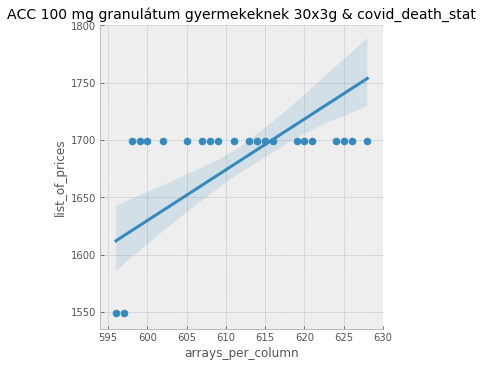

        y_pred  y_test
0  1674.712700    1699
1  1689.118123    1699
2  1684.316315    1699
3  1602.685587    1549
4  1645.901855    1699
5  1617.091010    1699
6  1737.136198    1699
7  1689.118123    1699
8  1660.307278    1699
9  1612.289202    1699


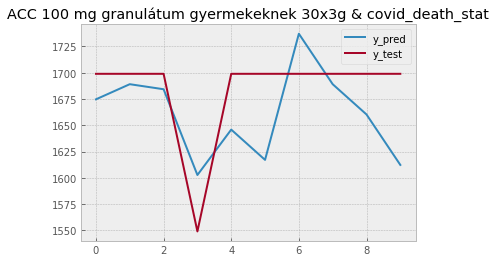

Mean Absolute Error: 41.0967179324562
Mean Squared Error: 2388.168322718294
Root Mean Squared Error: 48.86888910869874
2388.168322718294is higher than 10% of mean price:166.709


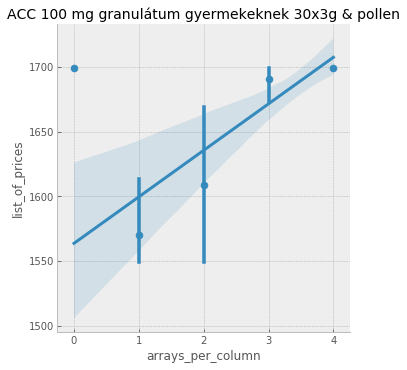

        y_pred  y_test
0  1713.853556    1699
1  1666.364017    1699
2  1523.895397    1699
3  1571.384937    1549
4  1713.853556    1699
5  1618.874477    1699
6  1713.853556    1699
7  1666.364017    1699
8  1713.853556    1699
9  1618.874477    1699


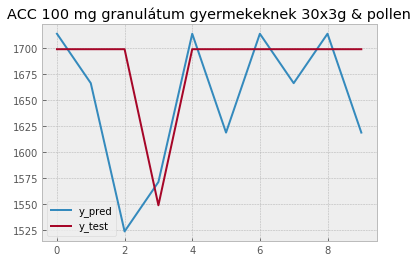

Mean Absolute Error: 48.24267782426773
Mean Squared Error: 4701.563347980591
Root Mean Squared Error: 68.56794694301844
4701.563347980591is higher than 10% of mean price:166.709


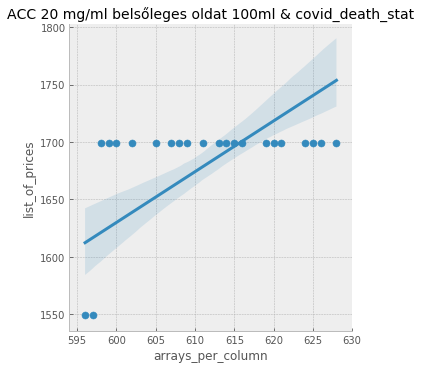

        y_pred  y_test
0  1674.712700    1699
1  1689.118123    1699
2  1684.316315    1699
3  1602.685587    1549
4  1645.901855    1699
5  1617.091010    1699
6  1737.136198    1699
7  1689.118123    1699
8  1660.307278    1699
9  1612.289202    1699


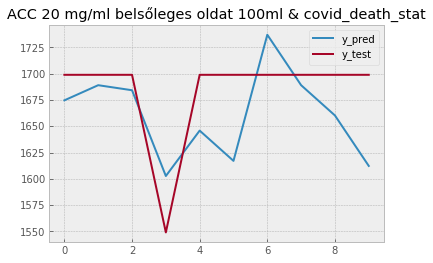

Mean Absolute Error: 41.0967179324562
Mean Squared Error: 2388.168322718294
Root Mean Squared Error: 48.86888910869874
2388.168322718294is higher than 10% of mean price:166.709


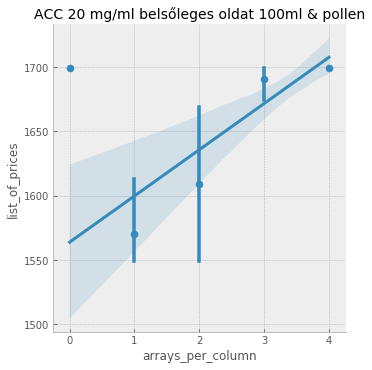

        y_pred  y_test
0  1713.853556    1699
1  1666.364017    1699
2  1523.895397    1699
3  1571.384937    1549
4  1713.853556    1699
5  1618.874477    1699
6  1713.853556    1699
7  1666.364017    1699
8  1713.853556    1699
9  1618.874477    1699


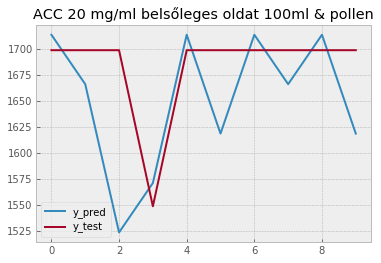

Mean Absolute Error: 48.24267782426773
Mean Squared Error: 4701.563347980591
Root Mean Squared Error: 68.56794694301844
4701.563347980591is higher than 10% of mean price:166.709


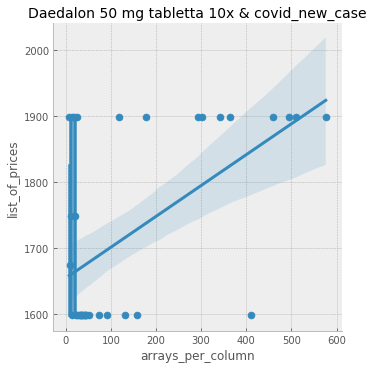

        y_pred  y_test
0  1681.951627    1599
1  1706.711896    1599
2  1682.393775    1599
3  1670.455788    1899
4  1676.203708    1599
5  1671.340083    1599
6  1891.971761    1899
7  1677.088003    1599
8  1683.720218    1599
9  1670.455788    1599


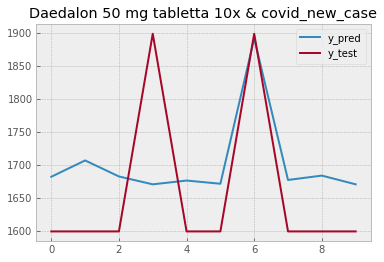

Mean Absolute Error: 89.34375481171578
Mean Squared Error: 10729.388075566083
Root Mean Squared Error: 103.58275954793869
10729.388075566083is higher than 10% of mean price:170.751


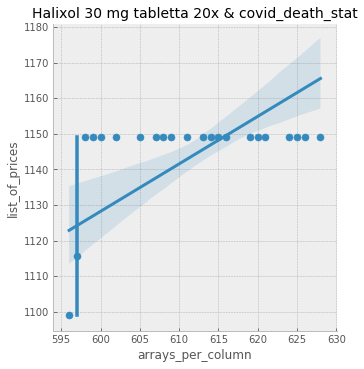

        y_pred  y_test
0  1141.828603    1149
1  1146.126209    1149
2  1144.693674    1149
3  1120.340574    1099
4  1133.233391    1149
5  1124.638180    1149
6  1160.451562    1149
7  1146.126209    1149
8  1137.530997    1149
9  1123.205645    1149


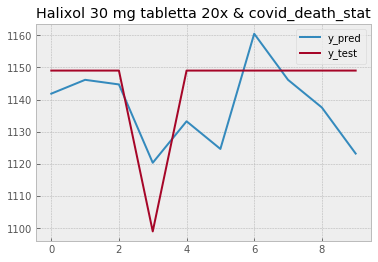

Mean Absolute Error: 12.7409227842081
Mean Squared Error: 231.20201180801254
Root Mean Squared Error: 15.205328401846918
231.20201180801254is higher than 10% of mean price:113.94300000000001


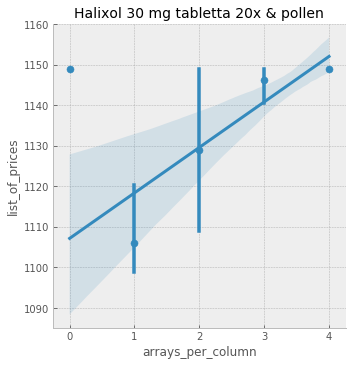

        y_pred  y_test
0  1154.020921    1149
1  1139.376569    1149
2  1095.443515    1149
3  1110.087866    1099
4  1154.020921    1149
5  1124.732218    1149
6  1154.020921    1149
7  1139.376569    1149
8  1154.020921    1149
9  1124.732218    1149


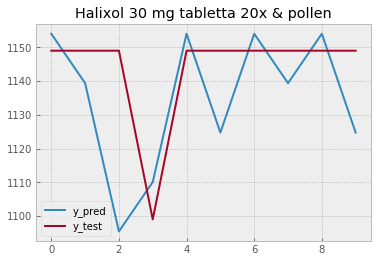

Mean Absolute Error: 15.251046025104642
Mean Squared Error: 445.5147844050383
Root Mean Squared Error: 21.107221143604818
445.5147844050383is higher than 10% of mean price:113.94300000000001


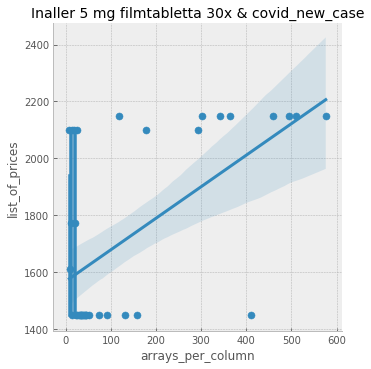

        y_pred  y_test
0  1629.828814    1449
1  1688.828411    1449
2  1630.882378    1449
3  1602.436143    2099
4  1616.132479    1449
5  1604.543272    1449
6  2130.271829    2149
7  1618.239607    1449
8  1634.043071    1449
9  1602.436143    1449


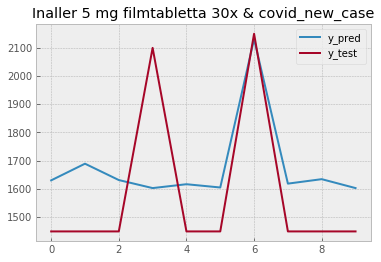

Mean Absolute Error: 194.8226202183937
Mean Squared Error: 50877.69418247108
Root Mean Squared Error: 225.56084363752296
50877.69418247108is higher than 10% of mean price:169.262


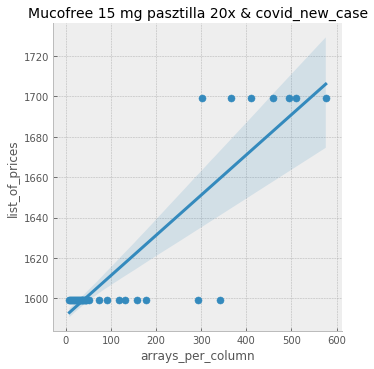

        y_pred  y_test
0  1597.805444    1599
1  1608.953503    1599
2  1598.004517    1599
3  1592.629560    1599
4  1595.217502    1599
5  1593.027705    1599
6  1692.364874    1699
7  1595.615647    1599
8  1598.601734    1599
9  1592.629560    1599


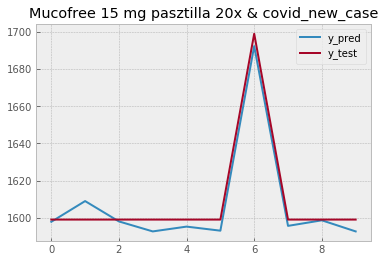

Mean Absolute Error: 4.5056960082451045
Mean Squared Error: 28.82681530387805
Root Mean Squared Error: 5.369060933150046
28.82681530387805is lower than 10% of mean price:161.389


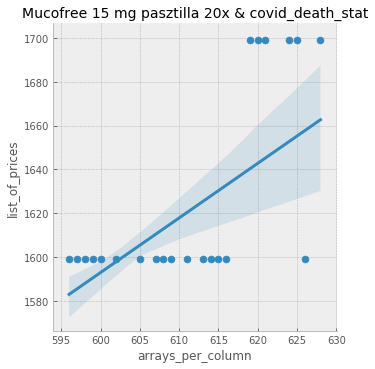

        y_pred  y_test
0  1621.643095    1599
1  1629.232282    1599
2  1626.702553    1599
3  1583.697162    1599
4  1606.464722    1599
5  1591.286349    1599
6  1654.529570    1699
7  1629.232282    1599
8  1614.053908    1599
9  1588.756620    1599


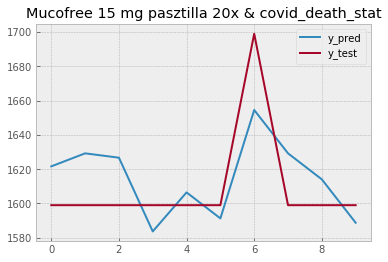

Mean Absolute Error: 21.10591406373867
Mean Squared Error: 576.668833638201
Root Mean Squared Error: 24.01392999153202
576.668833638201is higher than 10% of mean price:161.389


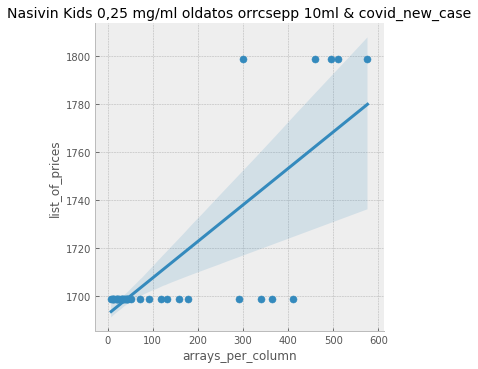

        y_pred  y_test
0  1697.338784    1699
1  1705.324581    1699
2  1697.481387    1699
3  1693.631092    1699
4  1695.484938    1699
5  1693.916299    1699
6  1765.075457    1799
7  1695.770145    1699
8  1697.909198    1699
9  1693.631092    1699


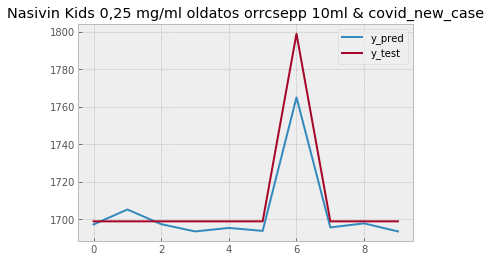

Mean Absolute Error: 6.708618841643078
Mean Squared Error: 130.34125809321873
Root Mean Squared Error: 11.4167096001089
130.34125809321873is lower than 10% of mean price:170.96400000000003


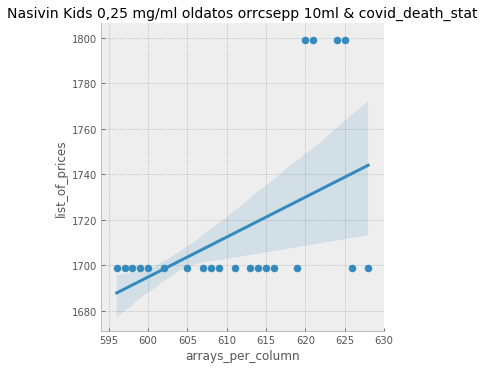

        y_pred  y_test
0  1713.996036    1699
1  1718.938164    1699
2  1717.290788    1699
3  1689.285397    1699
4  1704.111781    1699
5  1694.227525    1699
6  1735.411923    1799
7  1718.938164    1699
8  1709.053908    1699
9  1692.580149    1699


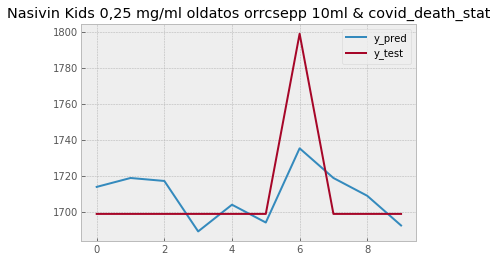

Mean Absolute Error: 17.282384651974006
Mean Squared Error: 568.3514178816667
Root Mean Squared Error: 23.840122019017997
568.3514178816667is higher than 10% of mean price:170.96400000000003


In [ ]:
#Walking through r05_all_v2

model_results=pd.DataFrame(columns=['product_name','model','data','mean_squared_error','mean_10%','is_fitting'])
list_of_product_name_lr=[]
list_of_model_lr=[]
list_of_data_lr=[]
list_of_msr_lr=[]
list_of_mean_10_lr=[]
list_of_fitting_lr=[]

for i in range(len(r05_all_v2)):
    y = r05_all_v2['price'].iloc[i][0:array_len].reshape(-1, 1)
    X = r05_all_v2['arrays_per_column'].iloc[i][0:array_len].reshape(-1, 1)
    #print(X)
    #print(y)
    #Splitting the dataset into the Training set and Test set
    
    
    sl_regression_temp_df_05=pd.DataFrame(columns=['list_of_prices','arrays_per_column'])
    sl_regression_temp_df_05['list_of_prices']=np.array(r05_list_of_prices_v2[i][0:array_len])
    sl_regression_temp_df_05['arrays_per_column']=np.array(r05_all_v2['arrays_per_column'].iloc[i][0:array_len])
    sl_regression_temp_df_05
    sns.lmplot(x="arrays_per_column", y="list_of_prices", data=sl_regression_temp_df_05, x_estimator=np.mean);
    plt.title(str(r05_all_v2.product_names.iloc[i])+" & "+str(r05_all_v2.column_name.iloc[i]),size=14)
    plt.show()
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    #print(len(X_train))
    #print(len(X_test))
    #print(len(y_train))
    #print(len(y_test))
    #Training the Multiple Linear Regression model on the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    #Predicting the Test set results
    y_pred = regressor.predict(X_test)
    #print(y_pred)
    #print(len(y_pred))
    np.set_printoptions(precision=2)
    #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    #print(y_pred.reshape(1, -1)[0])
    #print(y_test.reshape(1, -1)[0])
    
    pred_vs_test=pd.DataFrame(columns=(['y_pred','y_test']))
    pred_vs_test['y_pred']=tuple(y_pred.reshape(1, -1)[0])
    pred_vs_test['y_test']=tuple(y_test.reshape(1, -1)[0])
    print(pred_vs_test)                     

    lines = pred_vs_test.plot.line()
    plt.title(str(r05_all_v2.product_names.iloc[i])+" & "+str(r05_all_v2.column_name.iloc[i]))
    plt.show()
    
    
    #Evaluating the modell
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    #error should be lower than 10% 
    if ((metrics.mean_squared_error(y_test, y_pred)/r05_v3.mean_price.iloc[i])*100)<10:
        print(str(metrics.mean_squared_error(y_test, y_pred))+"is lower than 10% of mean price:"+str(r05_v3.mean_price.iloc[i]*0.1))
        list_of_fitting_lr.append('yes')
    else: print(str(metrics.mean_squared_error(y_test, y_pred))+"is higher than 10% of mean price:"+str(r05_v3.mean_price.iloc[i]*0.1));list_of_fitting_lr.append('no')
    #mean is less than 10% of the mean price so the prediction is good one
    
    
    list_of_product_name_lr.append(str(r05_all_v2.product_names.iloc[i]))
    list_of_model_lr.append('linear regression')
    list_of_data_lr.append(str(r05_all_v2.column_name.iloc[i]))
    list_of_msr_lr.append(metrics.mean_squared_error(y_test, y_pred))
    list_of_mean_10_lr.append(r05_v3.mean_price.iloc[i]*0.1)
    
    
model_results['product_name']=list_of_product_name_lr
model_results['model']=list_of_model_lr     
model_results['data']=list_of_data_lr
model_results['mean_squared_error']=list_of_msr_lr
model_results['mean_10%']=list_of_mean_10_lr
model_results['is_fitting']=list_of_fitting_lr
model_results

# create excel writer object
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y")
writer = pd.ExcelWriter(str(dt_string)+'linear_reg_summary_table_r05'+'.xlsx')
# write dataframe to excel
model_results.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

# Multi linear regression - for R05

In [ ]:
#Reminder how r05_all_v2 looks like
r05_all_v2

In [ ]:
len(r05_all_v2.product_names.unique())

In [ ]:
#Building the Multi linear model
#Walking through r05_all_v2
model_results=pd.DataFrame(columns=['product_name','model','data','mean_squared_error','mean_10%','is_fitting'])
list_of_product_name_lr=[]
list_of_model_lr=[]
list_of_data_lr=[]
list_of_msr_lr=[]
list_of_mean_10_lr=[]
list_of_fitting_lr=[]

# list_temp_list_of_product_names=[]
# list_temp_list_of_price=[]
# list_temp_list_of_columns=[]
# list_temp_list_of_arrays=[]
for i in range(len(r05_all_v2)):
    temp_df_05=r05_all_v2[r05_all_v2.product_names==r05_all_v2.product_names.iloc[i]]
    #print(temp_df_05)
    
    temp_list_of_columns=[]
    temp_list_of_arrays=[]
    temp_list_of_price=[]  
    temp_list_of_product_names=[]
    for i in range(len(temp_df_05)):
        temp_list_of_product_names.append(temp_df_05.product_names.iloc[i])
        temp_list_of_columns.append(temp_df_05.column_name.iloc[i])
        temp_list_of_arrays.append(temp_df_05.arrays_per_column.iloc[i])
        temp_list_of_price.append(temp_df_05.price.iloc[i])
        
    #print(len(temp_list_of_price))
    #print(temp_list_of_product_names[0])
    
#     list_temp_list_of_product_names.append(temp_list_of_product_names[0])
#     list_temp_list_of_price.append(temp_list_of_price[0])
#     list_temp_list_of_columns.append(temp_list_of_columns)
#     list_temp_list_of_arrays.append(temp_list_of_arrays)


#     print(list_temp_list_of_product_names)
#     print(list_temp_list_of_price)
#     print(temp_list_of_columns)
#     print(temp_list_of_arrays)
    
    if len(temp_list_of_columns)==3:
        temp_df_05_v2=pd.DataFrame(columns=['price', str(temp_list_of_columns[0]), str(temp_list_of_columns[1]), str(temp_list_of_columns[2])])
        temp_df_05_v2['price']=temp_list_of_price[0]
        temp_df_05_v2[str(temp_list_of_columns[0])]=temp_list_of_arrays[0][0:array_len]
        temp_df_05_v2[str(temp_list_of_columns[1])]=temp_list_of_arrays[1][0:array_len]
        temp_df_05_v2[str(temp_list_of_columns[2])]=temp_list_of_arrays[2][0:array_len]
        #print(temp_df_05_v2)
        X = temp_df_05_v2[[str(temp_list_of_columns[0]), str(temp_list_of_columns[1]), str(temp_list_of_columns[2])]] # x should include multiple df columns
        y = temp_df_05_v2['price']
        
#         #Splitting the dataset into the Training set and Test set
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#         print(len(X_train))
#         print(len(X_test))
#         print(len(y_train))
#         print(y_test)
        
#         #Training the Multiple Linear Regression model on the Training set
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        
#         #Predicting the Test set results
        y_pred = regressor.predict(X_test)
        #print(y_pred)
        #print(len(y_pred))
        np.set_printoptions(precision=2)
        #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
        #print(y_pred.reshape(1, -1)[0])
        #print(y_test.reshape(1, -1)[0])

        pred_vs_test=pd.DataFrame(columns=(['y_pred','y_test']))
#         pred_vs_test['y_pred']=tuple(y_pred.reshape(1, -1)[0])
#         pred_vs_test['y_test']=tuple(y_test.reshape(1, -1)[0])
        pred_vs_test['y_pred']=y_pred
        pred_vs_test['y_test']=tuple(y_test)
#         print(pred_vs_test)   
#         print(y_test)

        lines = pred_vs_test.plot.line()
        plt.title(str(temp_list_of_product_names[0])+" & "+str(temp_list_of_columns[0])+" & "+str(temp_list_of_columns[1])+" & "+str(temp_list_of_columns[2]))
        plt.show()

        #Evaluating the modell
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        
        

        #error should be lower than 10% 
        if ((metrics.mean_squared_error(y_test, y_pred)/r05_v3.mean_price.iloc[i])*100)<10:
            print(str(metrics.mean_squared_error(y_test, y_pred))+"is lower than 10% of mean price:"+str(r05_v3.mean_price.iloc[i]*0.1))
            list_of_fitting_lr.append('yes')
        else: print(str(metrics.mean_squared_error(y_test, y_pred))+"is higher than 10% of mean price:"+str(r05_v3.mean_price.iloc[i]*0.1));list_of_fitting_lr.append('no')
        #mean is less than 10% of the mean price so the prediction is good one
        
        list_of_product_name_lr.append(str(temp_list_of_product_names[0]))
        list_of_model_lr.append('multilinear regression')
        list_of_data_lr.append(str(temp_list_of_columns[0])+","+str(temp_list_of_columns[1])+","+str(temp_list_of_columns[2]))
        list_of_msr_lr.append(metrics.mean_squared_error(y_test, y_pred))
        list_of_mean_10_lr.append(r05_v3.mean_price.iloc[i]*0.1)
        

######################        
                
        
    if len(temp_list_of_columns)==2:
        temp_df_05_v2=pd.DataFrame(columns=['price',str(temp_list_of_columns[0]), str(temp_list_of_columns[1])])
        temp_df_05_v2['price']=temp_list_of_price[0]
        temp_df_05_v2[str(temp_list_of_columns[0])]=temp_list_of_arrays[0][0:array_len]
        temp_df_05_v2[str(temp_list_of_columns[1])]=temp_list_of_arrays[1][0:array_len]
        #print(temp_df_05_v2)
        X = temp_df_05_v2[[str(temp_list_of_columns[0]), str(temp_list_of_columns[1])]] # x should include multiple df columns
        y = temp_df_05_v2['price']
        
        #Splitting the dataset into the Training set and Test set
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#         print(len(X_train))
#         print(len(X_test))
#         print(len(y_train))
#         print(y_test)
        
        #Training the Multiple Linear Regression model on the Training set
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        
#         #Predicting the Test set results
        y_pred = regressor.predict(X_test)
        #print(y_pred)
        #print(len(y_pred))
#         np.set_printoptions(precision=2)
#         #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#         #print(y_pred.reshape(1, -1)[0])
#         #print(y_test.reshape(1, -1)[0])

        pred_vs_test=pd.DataFrame(columns=(['y_pred','y_test']))
#         pred_vs_test['y_pred']=tuple(y_pred.reshape(1, -1)[0])
#         pred_vs_test['y_test']=tuple(y_test.reshape(1, -1)[0])
        pred_vs_test['y_pred']=y_pred
        pred_vs_test['y_test']=tuple(y_test)
        print(pred_vs_test)    
        #print(y_test)

        lines = pred_vs_test.plot.line()
        plt.title(str(temp_list_of_product_names[0])+" & "+str(temp_list_of_columns[0])+" & "+str(temp_list_of_columns[1]))
        plt.show()


#         #Evaluating the modell
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

        #error should be lower than 10% 
        if ((metrics.mean_squared_error(y_test, y_pred)/r05_v3.mean_price.iloc[i])*100)<10:
            print(str(metrics.mean_squared_error(y_test, y_pred))+"is lower than 10% of mean price:"+str(r05_v3.mean_price.iloc[i]*0.1))
            list_of_fitting_lr.append('yes')
        else: print(str(metrics.mean_squared_error(y_test, y_pred))+"is higher than 10% of mean price:"+str(r05_v3.mean_price.iloc[i]*0.1));list_of_fitting_lr.append('no')
        #mean is less than 10% of the mean price so the prediction is good one
        
        list_of_product_name_lr.append(str(temp_list_of_product_names[0]))
        list_of_model_lr.append('multilinear regression')
        list_of_data_lr.append(str(temp_list_of_columns[0])+","+str(temp_list_of_columns[1]))
        list_of_msr_lr.append(metrics.mean_squared_error(y_test, y_pred))
        list_of_mean_10_lr.append(r05_v3.mean_price.iloc[i]*0.1)
            

model_results['product_name']=list_of_product_name_lr
model_results['model']=list_of_model_lr     
model_results['data']=list_of_data_lr
model_results['mean_squared_error']=list_of_msr_lr
model_results['mean_10%']=list_of_mean_10_lr
model_results['is_fitting']=list_of_fitting_lr
model_results

# create excel writer object
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y")
writer = pd.ExcelWriter(str(dt_string)+'multilinear_reg_summary_table_r05'+'.xlsx')
# write dataframe to excel
model_results.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

# Decision Tree - for all r05 products

In [ ]:
r05_all_v2

In [ ]:
# Walking through r05_all_v2 and generate temp dfs based on that calculate decision tree per each product

model_results=pd.DataFrame(columns=['product_name','model','data','mean_squared_error','mean_10%','is_fitting'])
list_of_product_name_lr=[]
list_of_model_lr=[]
list_of_data_lr=[]
list_of_msr_lr=[]
list_of_mean_10_lr=[]
list_of_fitting_lr=[]

for i in range(len(r05_all_v2)):
    y = r05_all_v2['price'].iloc[i][0:array_len].reshape(-1, 1)
    X = r05_all_v2['arrays_per_column'].iloc[i][0:array_len].reshape(-1, 1)
    #print(X)
    #print(y)
    #print(X)
    #print(y)
    #Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    #print(y_test)
    #print(X_test)
    #Training the Decision Tree model on the Training set
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    #Predicting the Test set results
    y_pred = regressor.predict(X_test)
    #print(y_pred)
    np.set_printoptions(precision=2)
    #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    
    pred_vs_test=pd.DataFrame(columns=(['y_pred','y_test']))
    pred_vs_test['y_pred']=tuple(y_pred.reshape(1, -1)[0])
    pred_vs_test['y_test']=tuple(y_test.reshape(1, -1)[0])
    print(pred_vs_test)                     

    lines = pred_vs_test.plot.line()
    plt.title(str(r05_all_v2.product_names.iloc[i])+" & "+str(r05_all_v2.column_name.iloc[i]))
    plt.show()
    
  #Evaluating the modell
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    #error should be lower than 10% 
    if ((metrics.mean_squared_error(y_test, y_pred)/r05_v3.mean_price.iloc[i])*100)<10:
        print(str(metrics.mean_squared_error(y_test, y_pred))+"is lower than 10% of mean price:"+str(r05_v3.mean_price.iloc[i]*0.1))
        list_of_fitting_lr.append('yes')
    else: print(str(metrics.mean_squared_error(y_test, y_pred))+"is higher than 10% of mean price:"+str(r05_v3.mean_price.iloc[i]*0.1)); list_of_fitting_lr.append('no')
    #mean is less than 10% of the mean price so the prediction is good one
    
    list_of_product_name_lr.append(str(r05_all_v2.product_names.iloc[i]))
    list_of_model_lr.append('decision_tree')
    list_of_data_lr.append(str(r05_all_v2.column_name.iloc[i]))
    list_of_msr_lr.append(metrics.mean_squared_error(y_test, y_pred))
    list_of_mean_10_lr.append(r05_v3.mean_price.iloc[i]*0.1)
    

model_results['product_name']=list_of_product_name_lr
model_results['model']=list_of_model_lr     
model_results['data']=list_of_data_lr
model_results['mean_squared_error']=list_of_msr_lr
model_results['mean_10%']=list_of_mean_10_lr
model_results['is_fitting']=list_of_fitting_lr
model_results

# create excel writer object
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y")
writer = pd.ExcelWriter(str(dt_string)+'decision_tree_summary_table_r05'+'.xlsx')
# write dataframe to excel
model_results.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

In [ ]:
model_results

# Rank Correlation here: https://realpython.com/numpy-scipy-pandas-correlation-python/

In [ ]:
type(r05_all_v2['arrays_per_column'][0][0])

In [ ]:
r05_all_v2['product_names'].iloc[0]

In [ ]:
r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[0]])]

In [ ]:
r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[0]])]['price']

In [ ]:
r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[0]])]['price'][0][0:array_len]
#from this i always need the 1st item

In [ ]:
x=r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[5]])]['price'].iloc[0][0:array_len]
x
r05_all_v2['product_names'].iloc[5]

In [ ]:
r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[1]])]['arrays_per_column'][0][0:array_len]

In [ ]:
r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[1]])]['arrays_per_column'].iloc[0][0:array_len].tolist()
#y.append(r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[i]])]['arrays_per column'].iloc[0][0:array_len].tolist())

In [ ]:
len(r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[0]])]['arrays_per_column'])

In [ ]:
corr_matrix_array=[]
xyz_array=[]
for i in range(len(r05_all_v2)):
    if len(r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[i]])]['arrays_per_column'])>1: 
        x=r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[i]])]['price'].iloc[0][0:array_len].tolist()
        x = [int(i) for i in x]
        y=r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[i]])]['arrays_per_column'].iloc[0][0:array_len].tolist()
        y = [int(i) for i in y]
        z=r05_all_v2[r05_all_v2['product_names'].isin([r05_all_v2['product_names'].iloc[i]])]['arrays_per_column'].iloc[1][0:array_len].tolist()
        z = [int(i) for i in z]
        xyz=[x,y,z]
        #print(xyz)
        xyz=np.array(xyz)
        #print(xyz) 
        xyz_array.append(xyz)
        corr_matrix = np.corrcoef(xyz).round(decimals=2)
        corr_matrix_array.append(corr_matrix)
        #print(r05_all_v2['product_names'].iloc[i])
        print(corr_matrix)
        fig, ax = plt.subplots()
        im = ax.imshow(corr_matrix)
        im.set_clim(-1, 1)
        ax.grid(False)
        ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y','z'))
        ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y','z'))
        ax.set_ylim(2.5, -0.5)
        plt.title(r05_all_v2['product_names'].iloc[i], size=22)
        for i in range(3):
            for j in range(3):
                ax.text(j, i, corr_matrix[i, j], ha='center', va='center',color='black', weight='bold', size=14)
                #print(corr_matrix[i, j])             
        cbar = ax.figure.colorbar(im, ax=ax, cmap="Blues", format='% .2f')
        cbar.ax.tick_params(labelsize=12) 
        plt.show()
        

